In [45]:
#Import data
import pandas as pd
file = "binary"
DATAFILE = "./prepared_data/join_"+file+"_scale.csv"
Purchase_DF = pd.read_csv(DATAFILE)
print(list(Purchase_DF))
# Purchase_DF

['mean_unexpcost', 'median_unexpcost', 'mean_stdcost', 'median_stdcost', 'mean_pocost', 'median_pocost', 'mean_qty', 'median_qty', 'mean_costsave', 'median_costsave', 'mean_spend', 'median_spend', 'mean_return_spend', 'median_return_spend', 'mean_leadtime', 'median_leadtime', 'mean_abc', 'median_abc', 'mean_source', 'median_source', 'Category', 'mean_late', 'median_late', 'mean_early', 'median_early', '%Critical', 'SupplierID', 'quality_risk_mean', 'quality_risk_median', 'delivery_risk_mean', 'delivery_risk_median']


In [46]:
#Select features
PCA_feats = ['mean_unexpcost', 'mean_return_spend', 'mean_qty', 'mean_costsave', 'mean_spend',
             'mean_leadtime','mean_abc', 'mean_source',
             'mean_late', 'mean_early','%Critical', 'quality_risk_mean', 'delivery_risk_mean']
# PCA_feats = ['mean_unexpcost', 'mean_return_spend','mean_spend',
#              'mean_late', 'mean_early','%Critical', 'quality_risk_mean', 'delivery_risk_mean']
Purch_PCA = Purchase_DF[PCA_feats]
Purch_PCA = Purch_PCA.dropna()
x = Purch_PCA

In [47]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [48]:
x = Purch_PCA
print(x)
# X
# print(X[1,0])

     mean_unexpcost  mean_return_spend  mean_qty  mean_costsave  mean_spend  \
0          2.000000           1.000000  1.428571       2.000000    1.000000   
1          1.000000           1.100000  1.800000       1.600000    1.200000   
2          1.000000           1.000000  2.000000       2.000000    1.000000   
3          1.121053           1.021053  1.000000       1.978947    1.826316   
4          1.666667           1.000000  1.851852       1.370370    1.814815   
5          1.894737           1.000000  1.000000       1.315789    1.210526   
6          1.166667           1.000000  1.000000       1.555556    1.000000   
7          1.000000           1.000000  1.100000       2.000000    1.000000   
8          1.000000           1.000000  1.000000       2.000000    1.000000   
9          1.333333           1.000000  1.000000       2.000000    1.666667   
10         1.363636           1.045455  1.000000       1.772727    1.045455   
11         2.000000           1.000000  1.206897    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


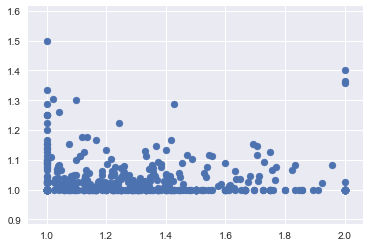

In [49]:
# rng = np.random.RandomState(1)
# X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
X = Purch_PCA.as_matrix()
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_)
print(pca.explained_variance_)

[[-2.53881392e-01  1.45429019e-02 -3.31368286e-01  1.06102850e-01
   2.73197346e-01  8.10211762e-02  2.16401834e-01  6.97572220e-01
   3.27121403e-03  1.63505070e-02  4.45792702e-01  2.28087567e-02
   1.01290474e-02]
 [ 1.66060494e-01  1.73484416e-02  1.05361126e-01 -1.80119185e-01
   3.79437409e-01  5.80788093e-01  3.09886960e-01 -4.31931650e-01
  -1.23774735e-03  3.40738326e-02  3.99974566e-01 -2.12330915e-04
   5.96184850e-02]]
[0.20776953 0.18018209]


In [51]:
# pca=PCA_method(Purch_PCA) 
pca = PCA(n_components=6)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (578, 13)
transformed shape: (578, 6)


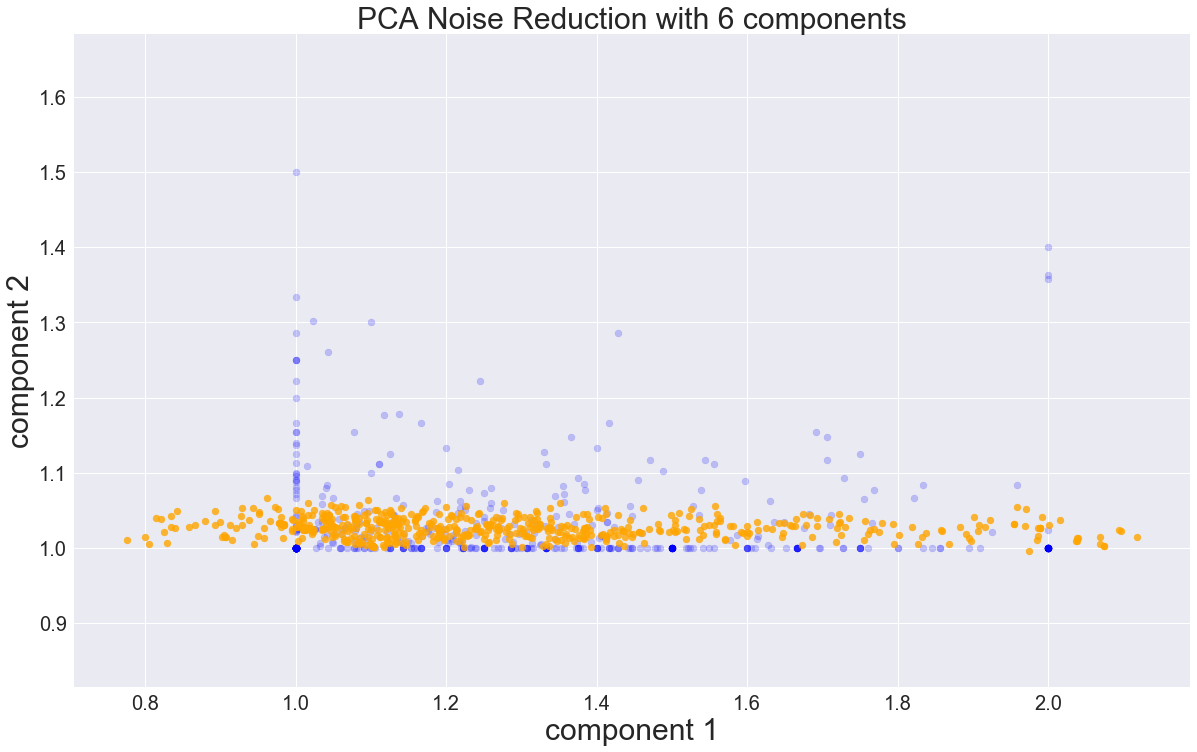

In [52]:
X_new = pca.inverse_transform(X_pca)
plt.figure(figsize=(20,12))
plt.xlabel('component 1', fontsize=30)
plt.ylabel('component 2', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.title("PCA Noise Reduction with 6 components", fontsize=30)


plt.scatter(X[:, 0], X[:, 1], alpha=0.2, color = "b")
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, color = "orange")
plt.axis('equal');
plt.savefig(file+"_bin_noise_reduction")

In [9]:
# from sklearn.datasets import load_digits
# digits = load_digits()
# digits.data.shape

In [10]:
# pca = PCA(6)  # project from 64 to 2 dimensions
# projected = pca.fit_transform(digits.data)
# print(digits.data.shape)
# print(projected.shape)

In [11]:
pca = PCA()  # project from 64 to 2 dimensions
projected = pca.fit_transform(x)
print(x.shape)
print(projected.shape)
# print(digits.target)

(578, 13)
(578, 13)


In [12]:
print(pca.explained_variance_)

[0.20776953 0.18018209 0.15022487 0.13347237 0.10723062 0.07848615
 0.06198575 0.05698515 0.04214273 0.01723788 0.00624712 0.00331261
 0.00057598]


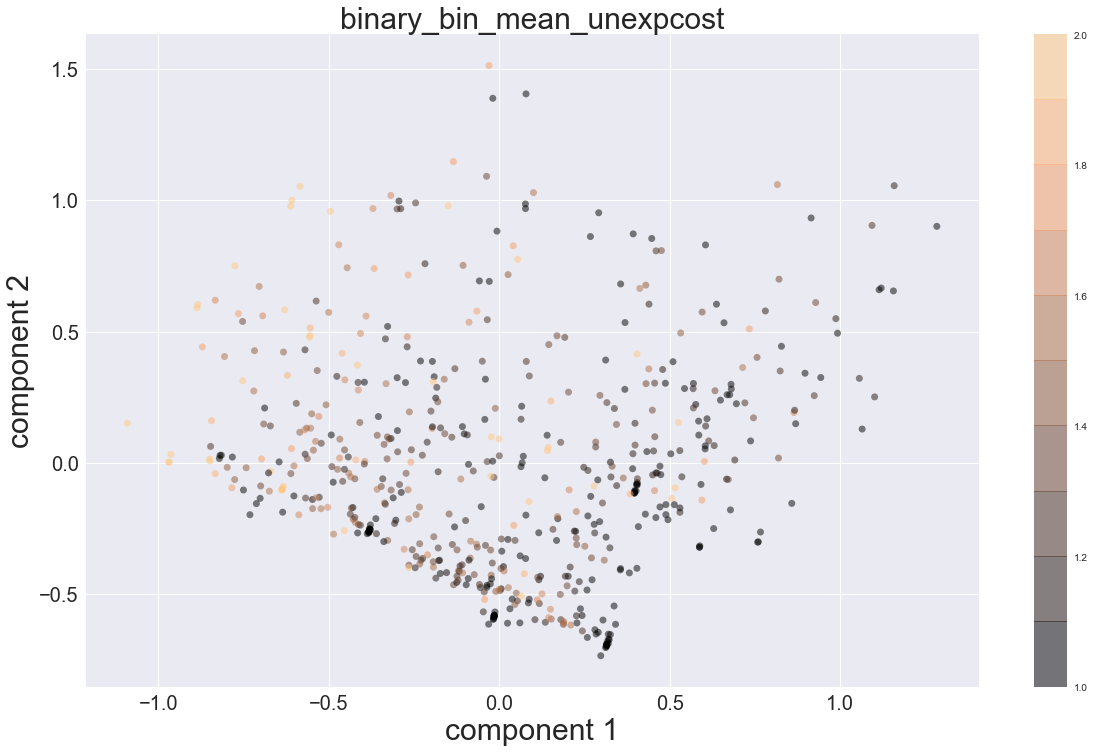

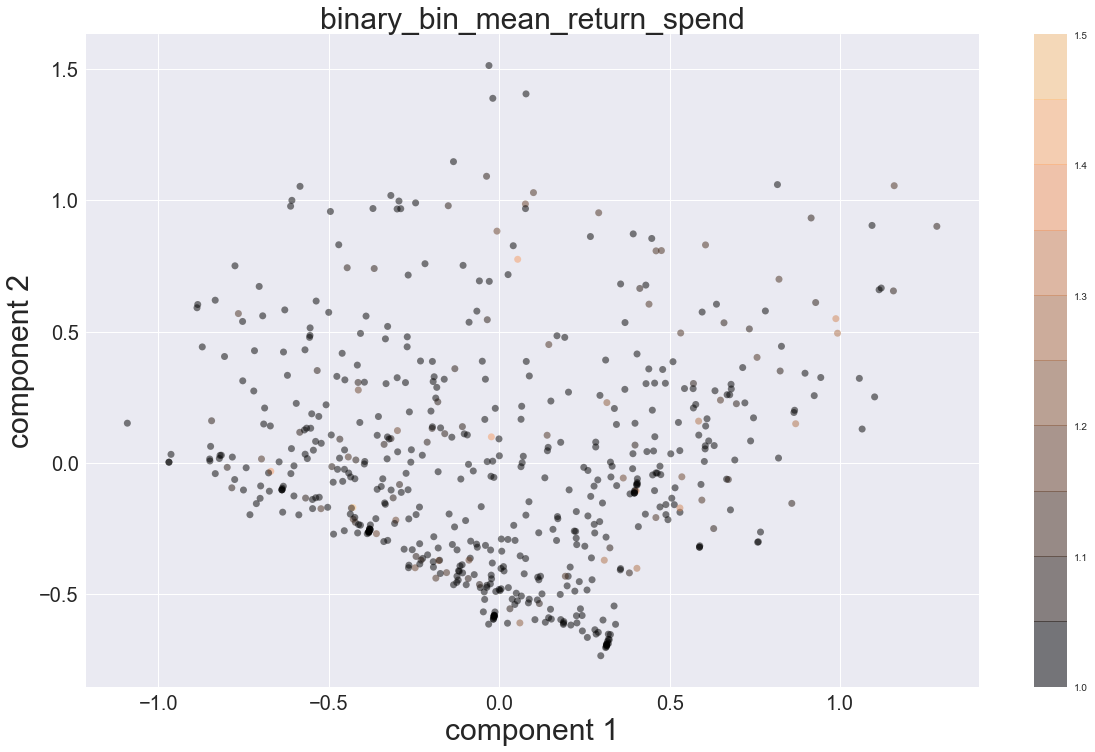

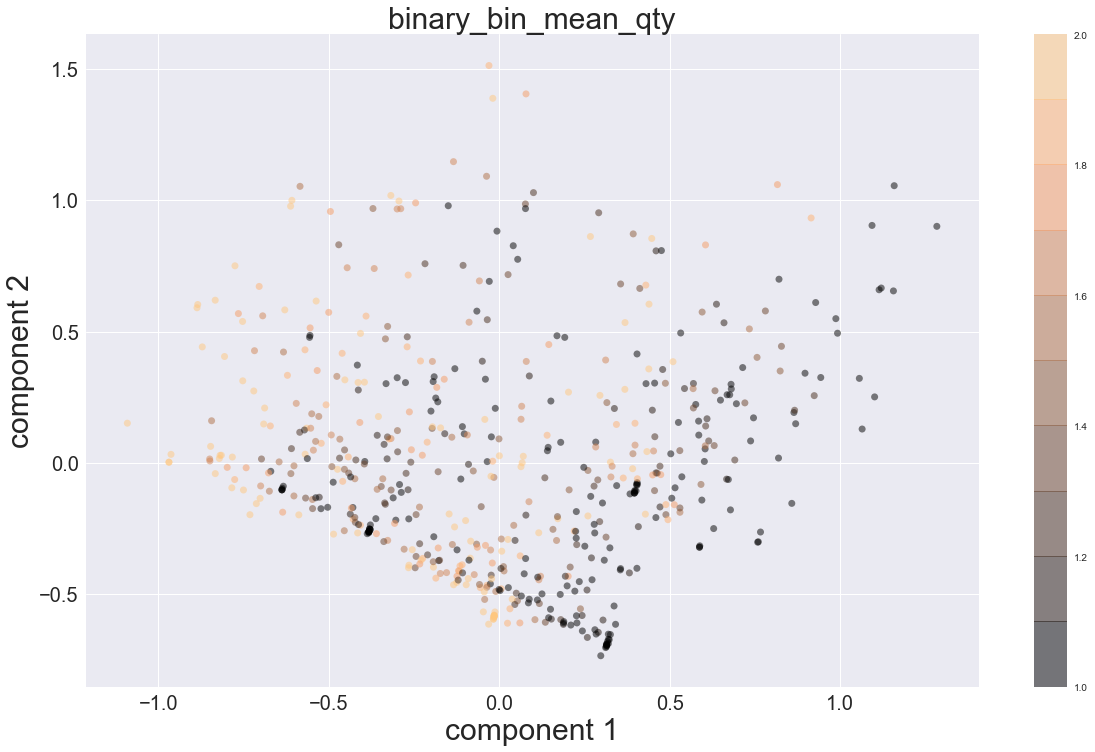

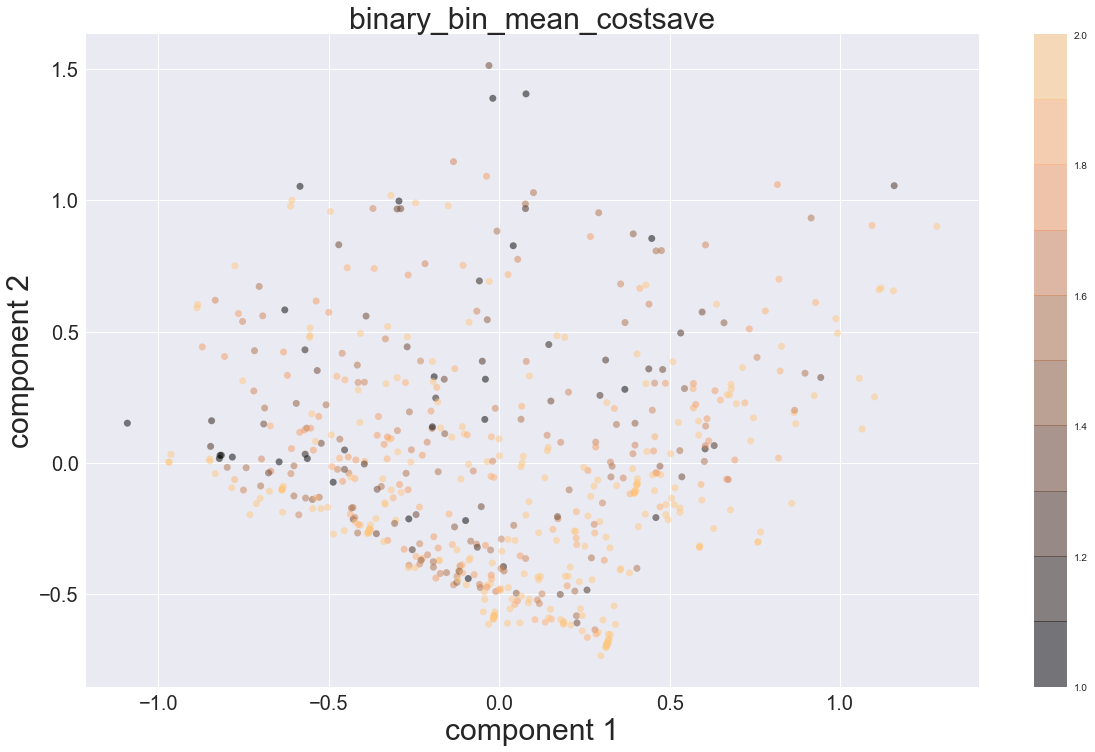

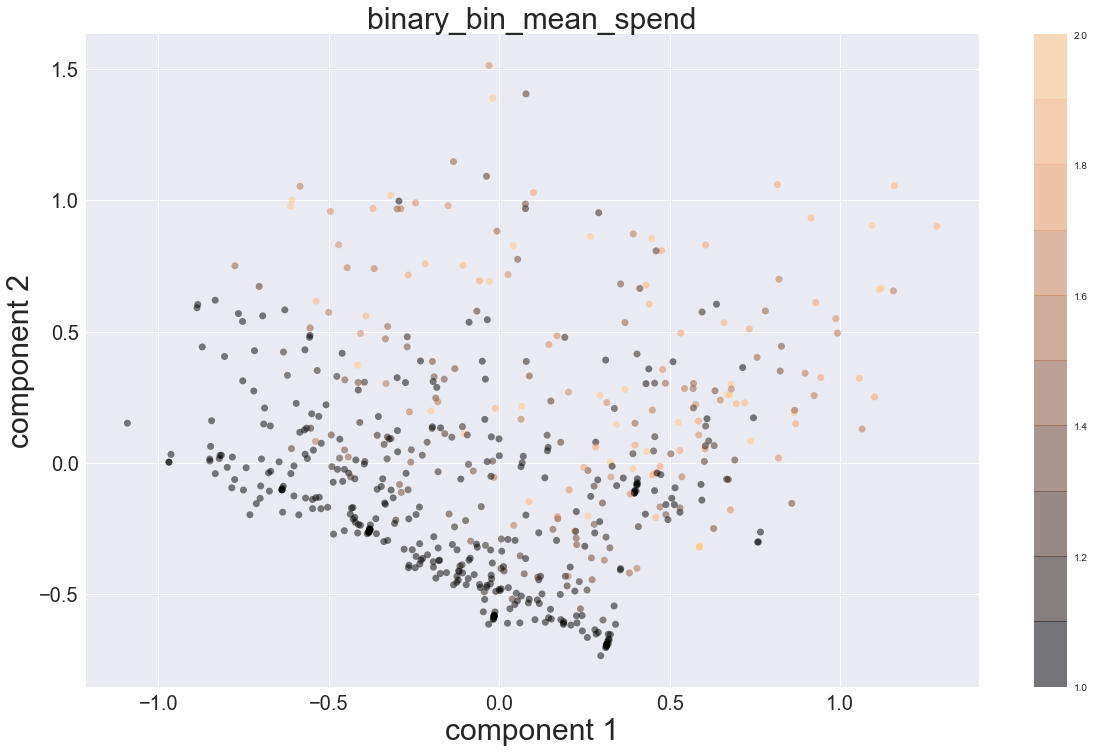

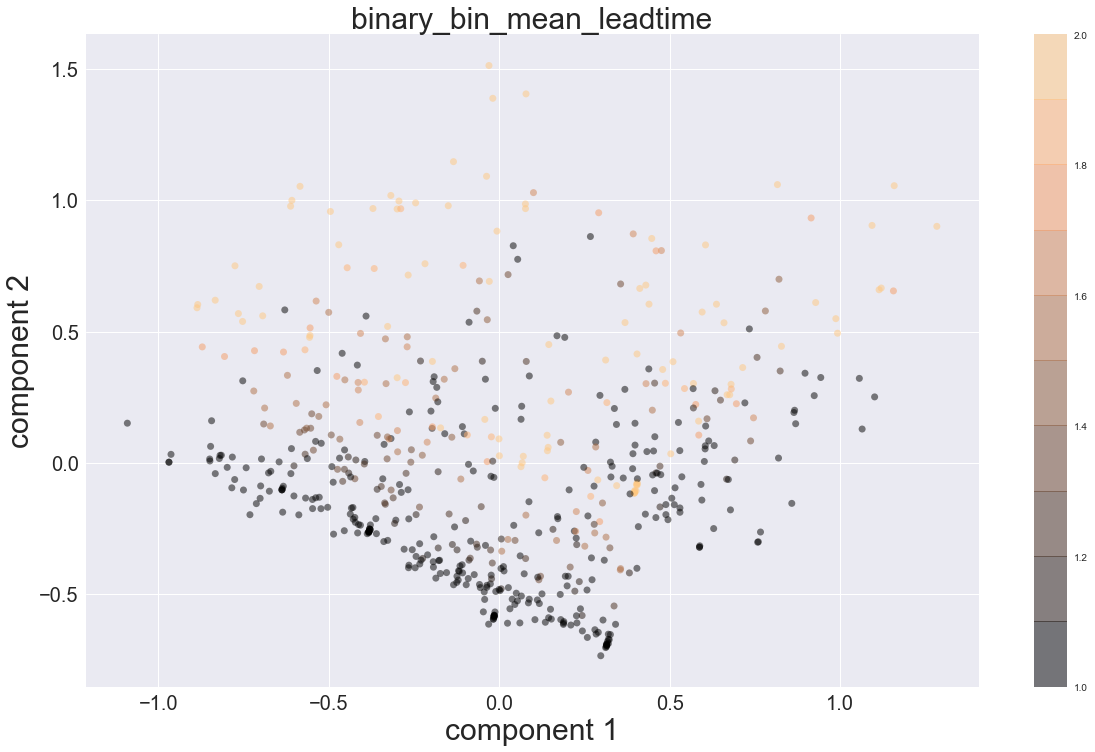

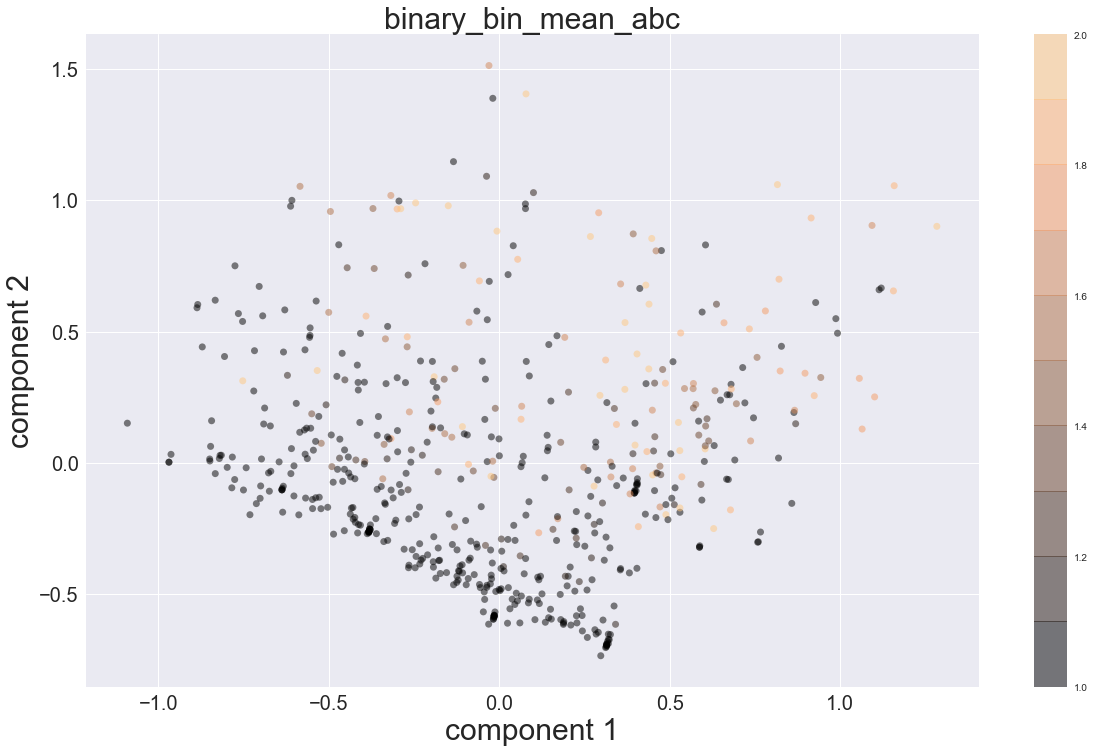

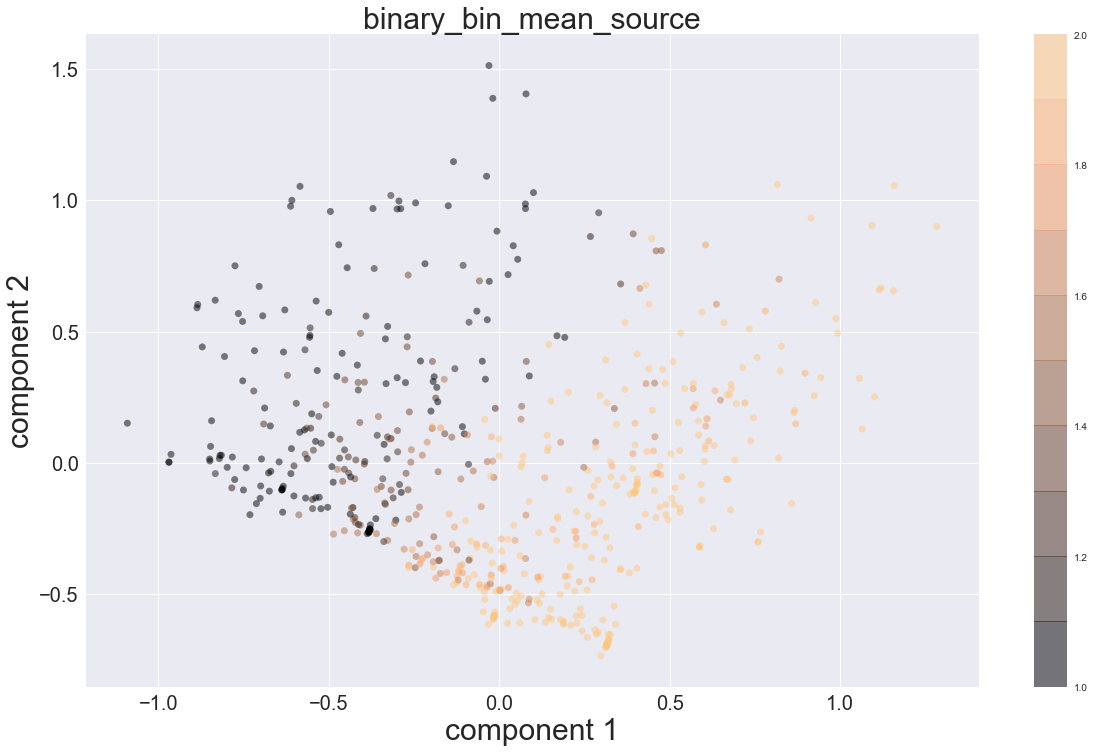

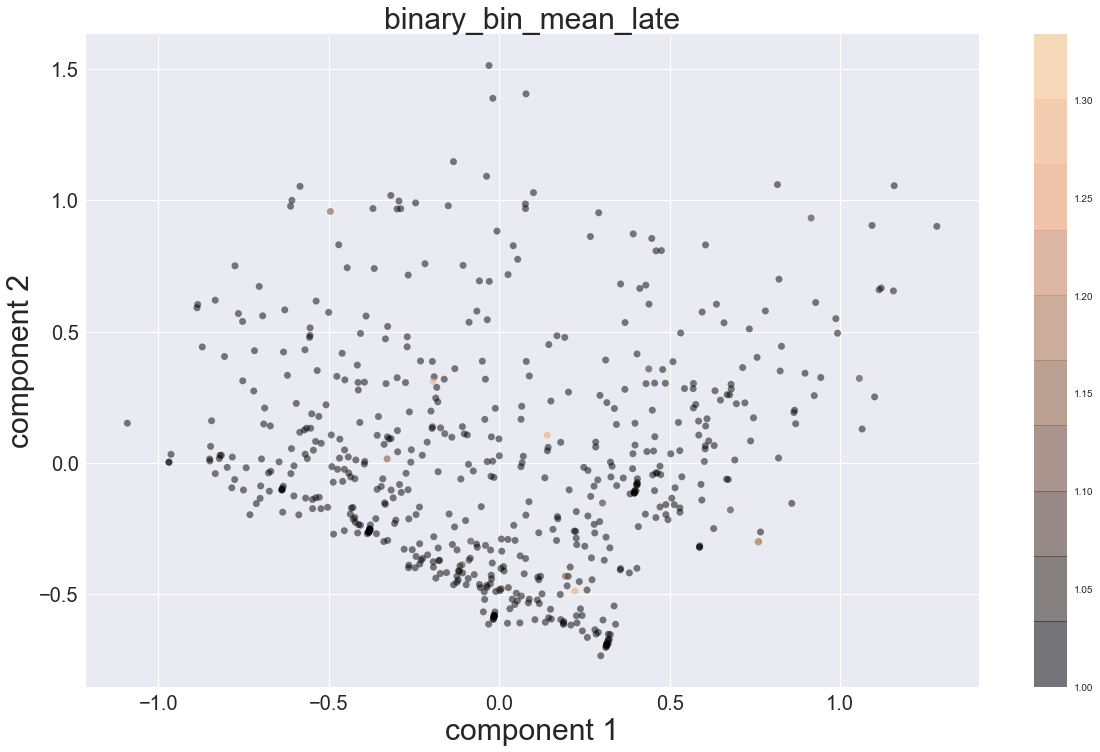

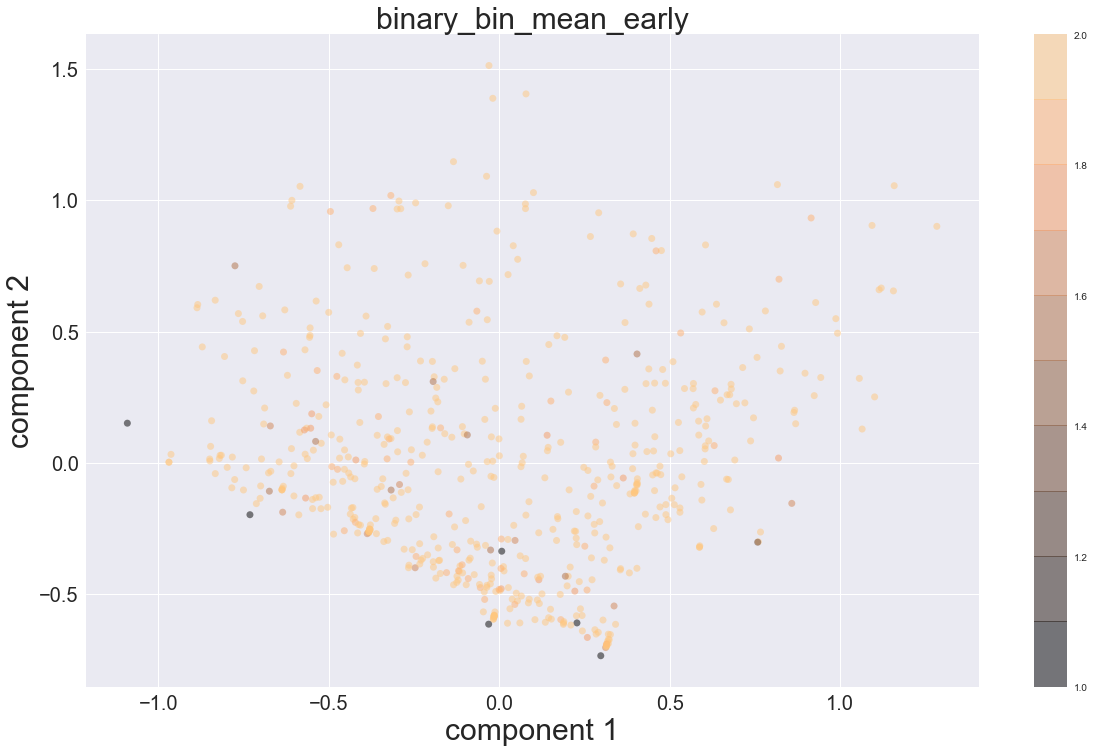

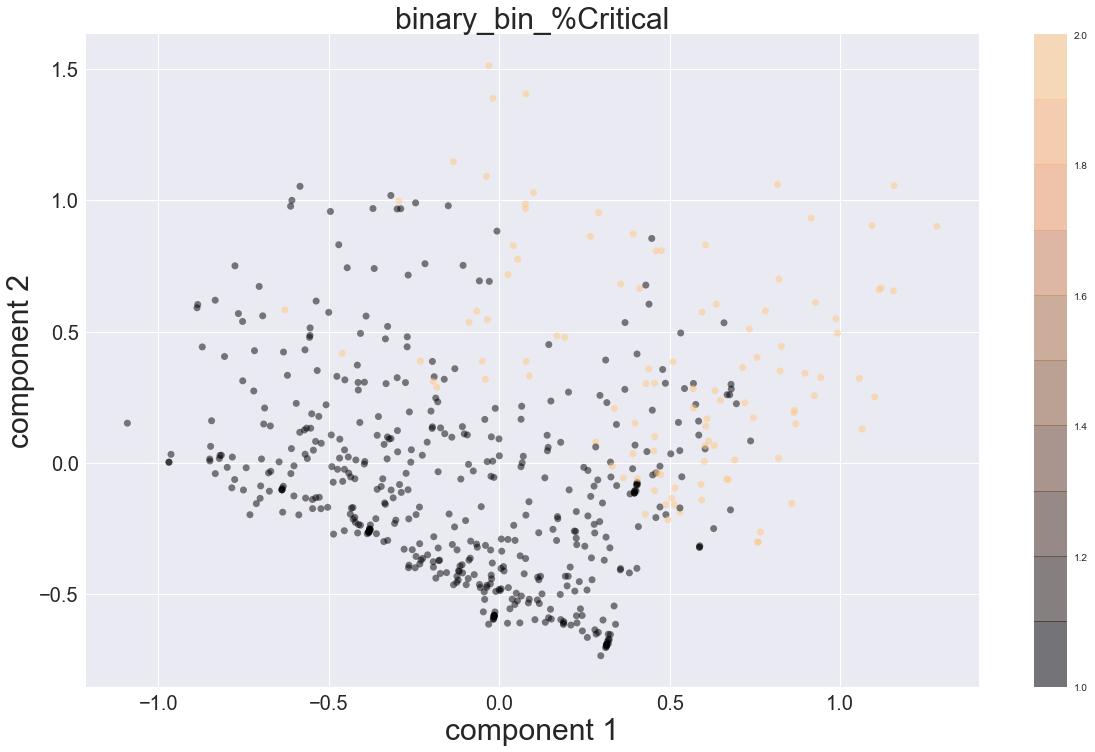

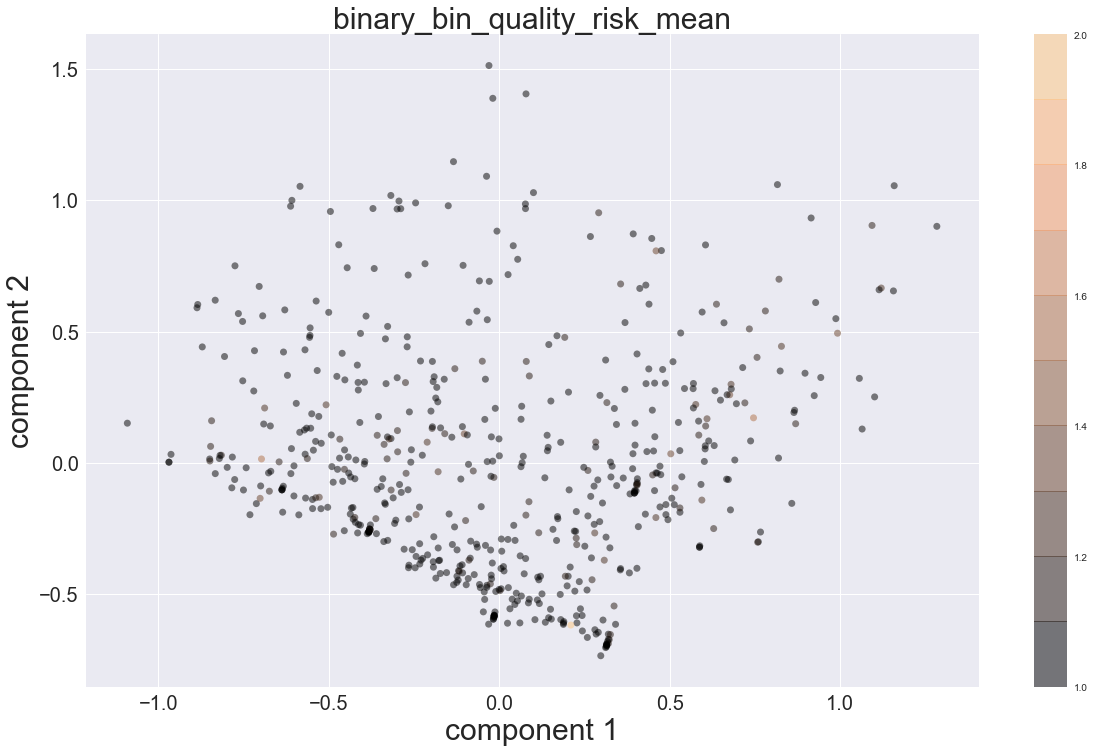

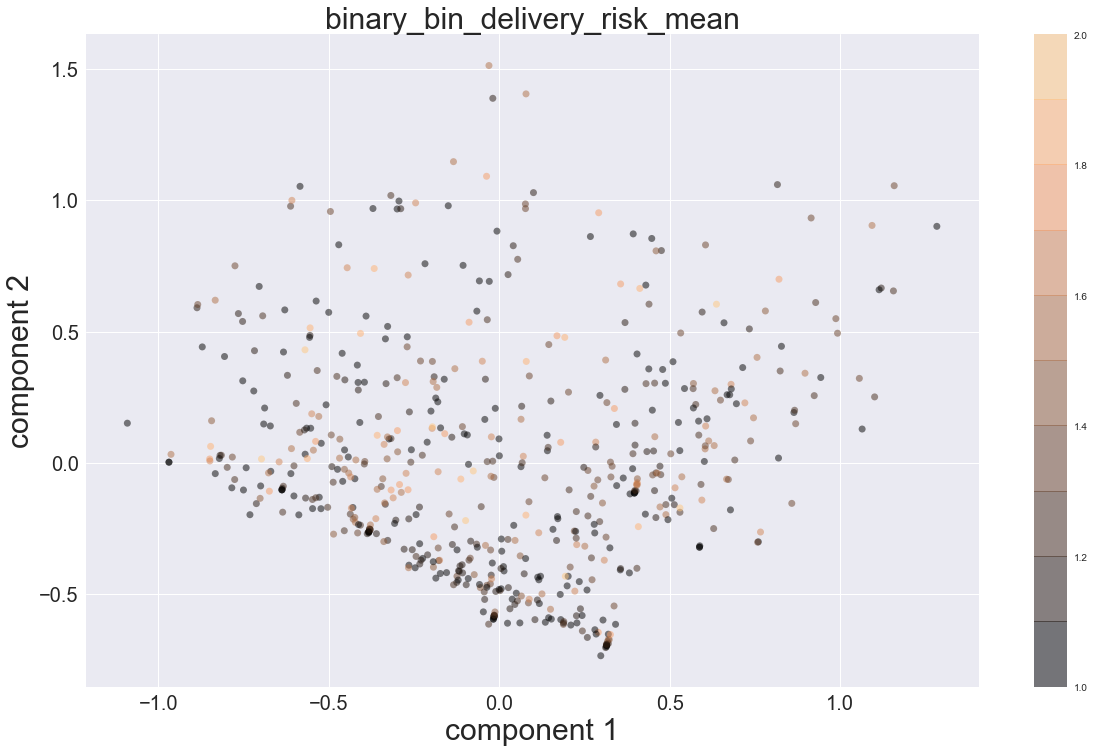

In [13]:
for feat in PCA_feats:
    plt.figure(figsize=(20,12))
    plt.scatter(projected[:, 0], projected[:, 1],
                c=x[feat], edgecolor='none', alpha=0.5,
                cmap=plt.cm.get_cmap('copper', 10))
    plt.xlabel('component 1', fontsize=30)
    plt.ylabel('component 2', fontsize=30)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)
    plt.title(file+"_bin_"+feat, fontsize=30)
    plt.colorbar();
    fname = file+"_PCA_1_2_" + feat
    plt.savefig(fname)
    plt.show()

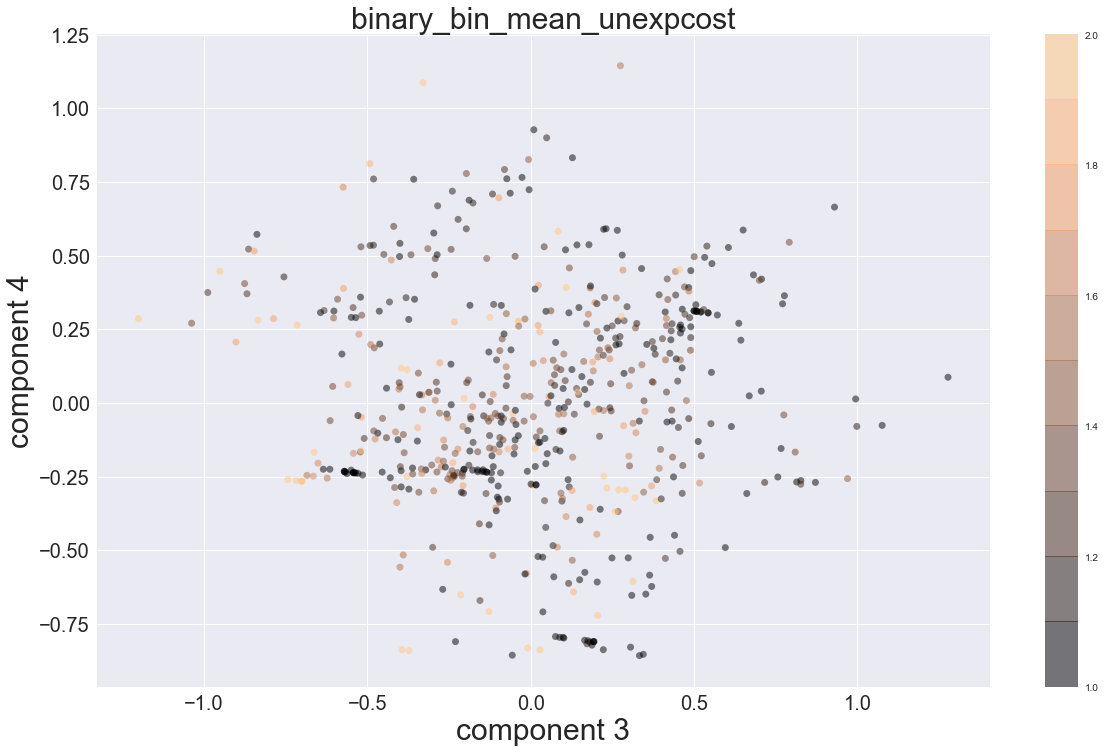

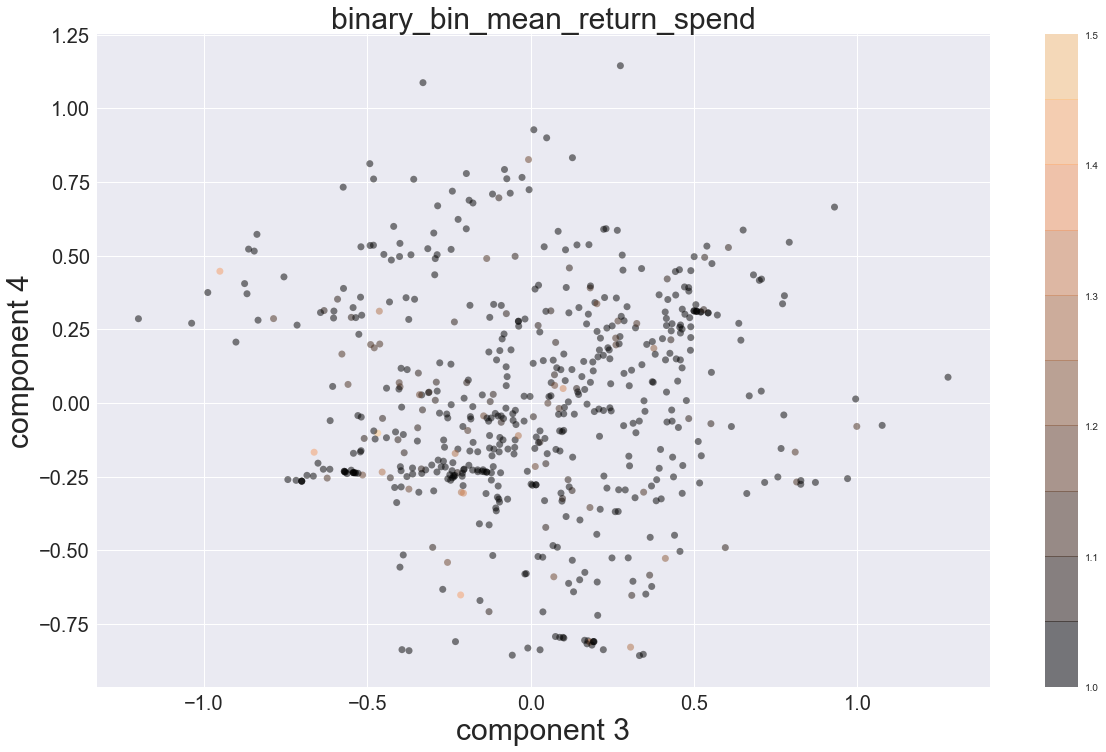

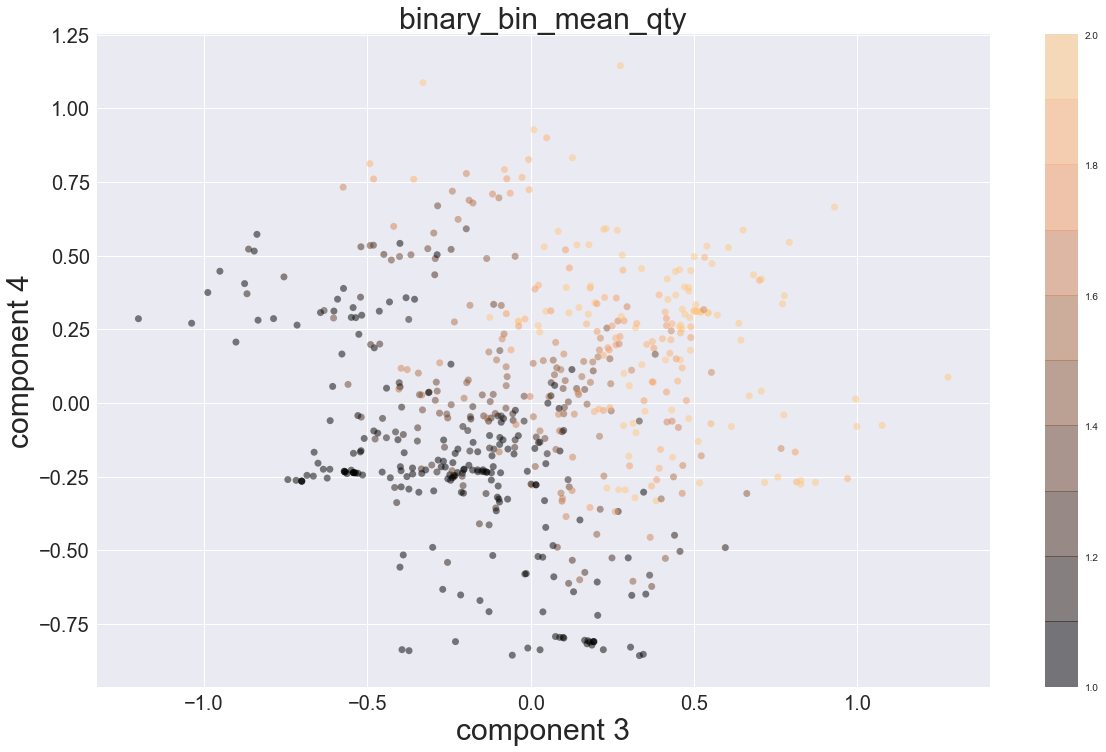

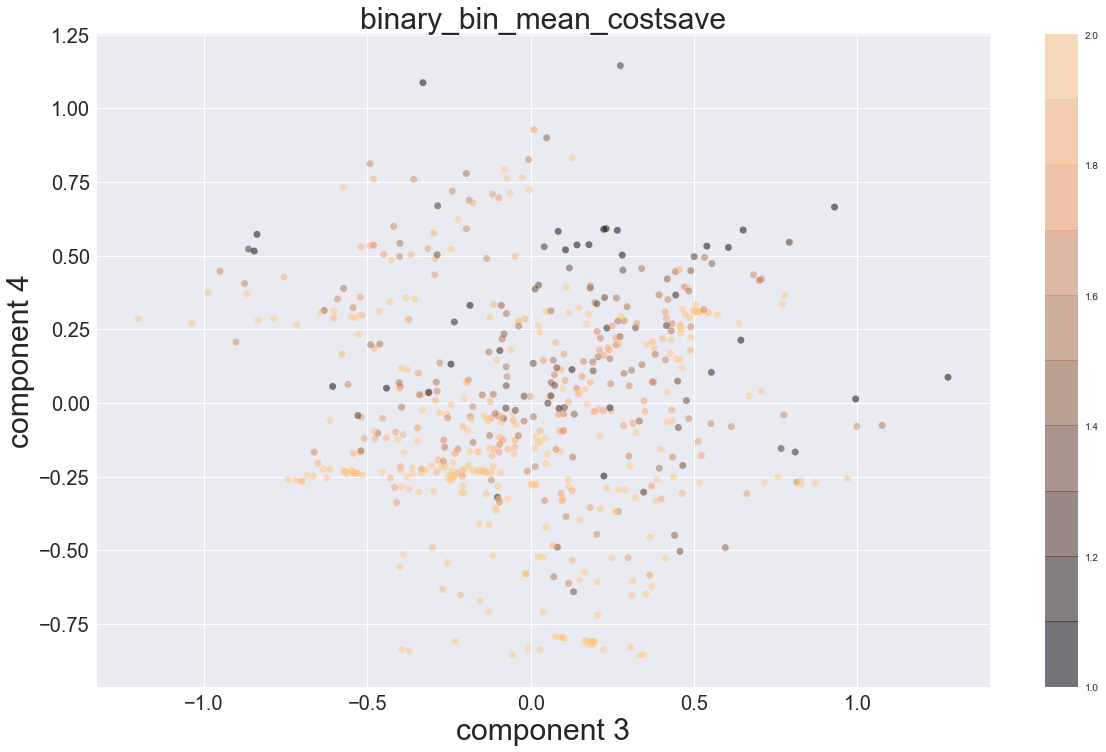

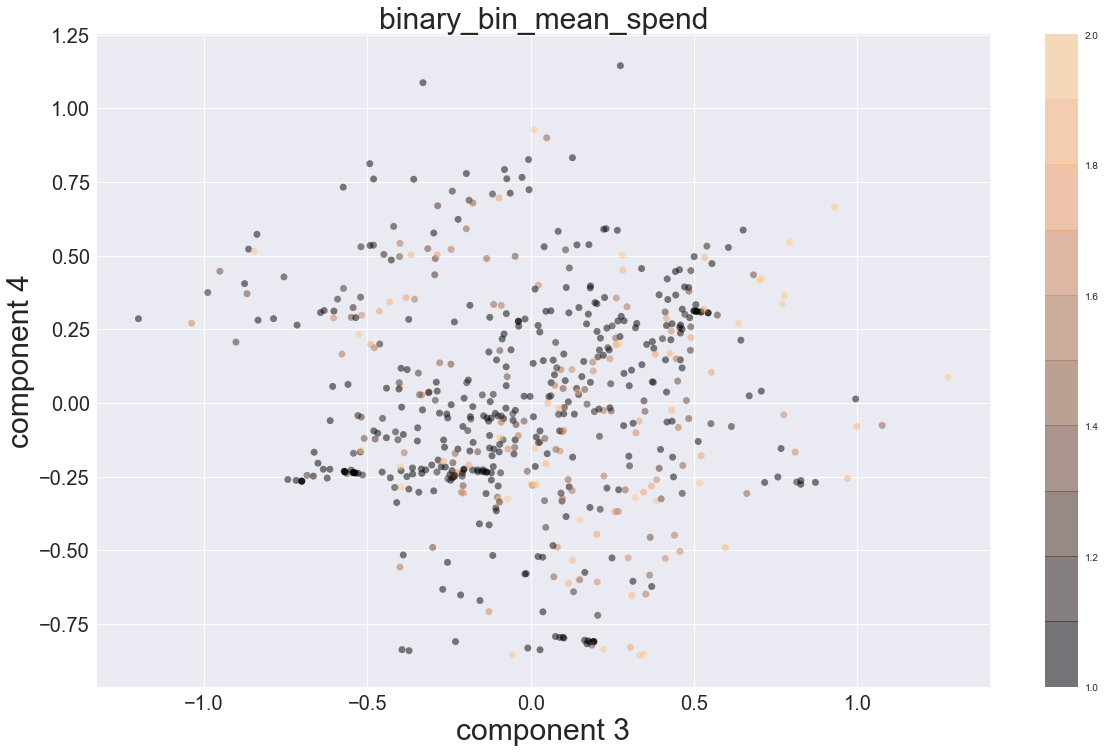

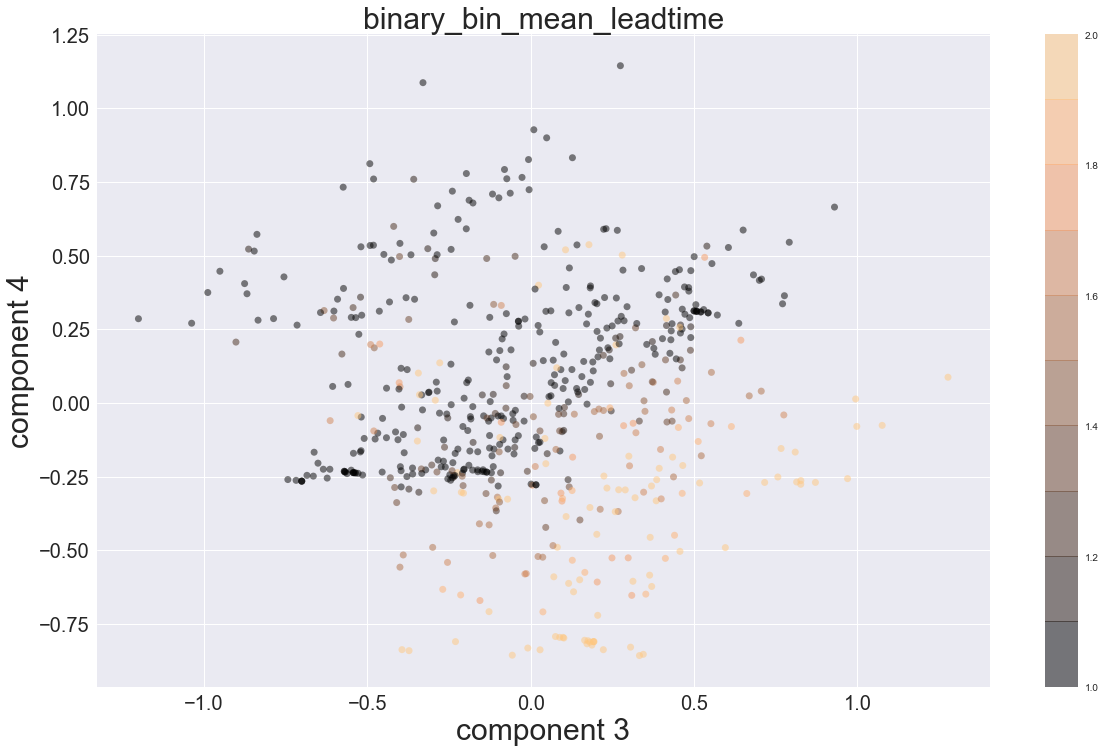

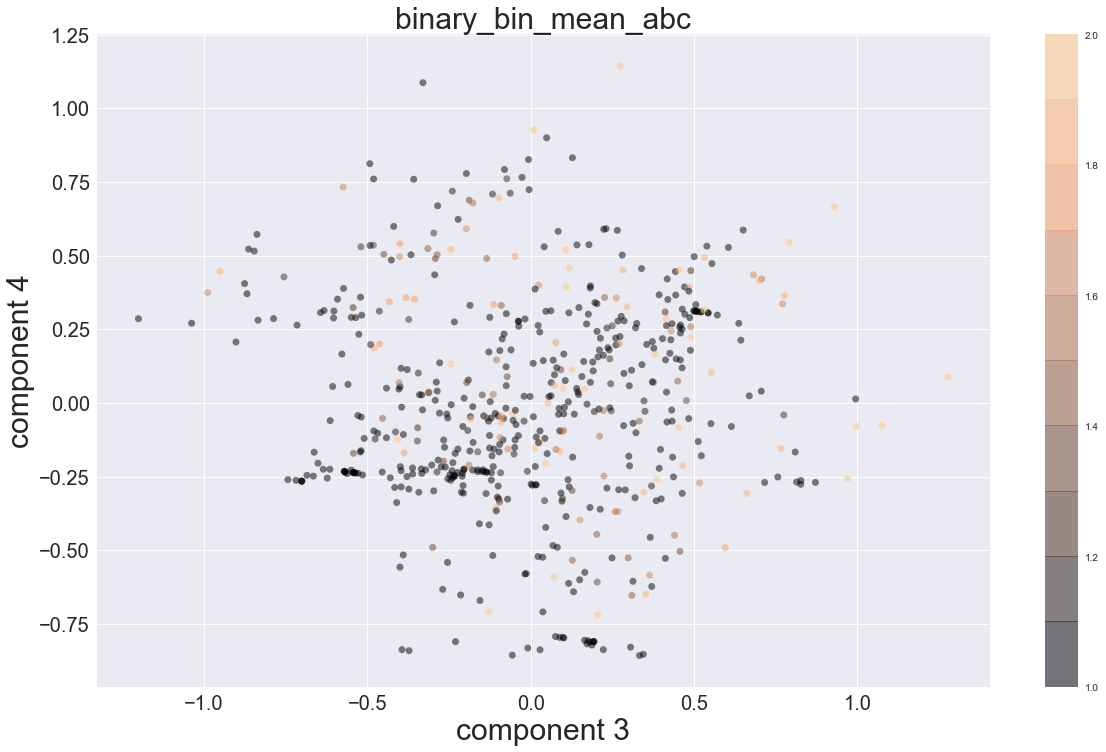

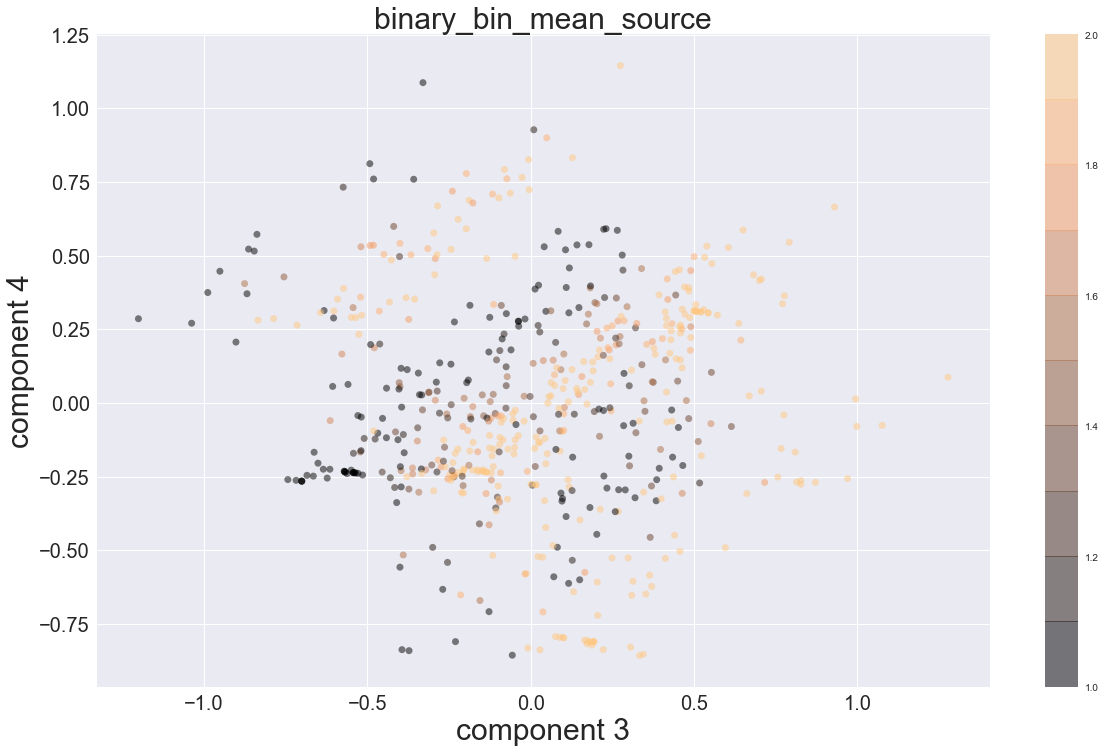

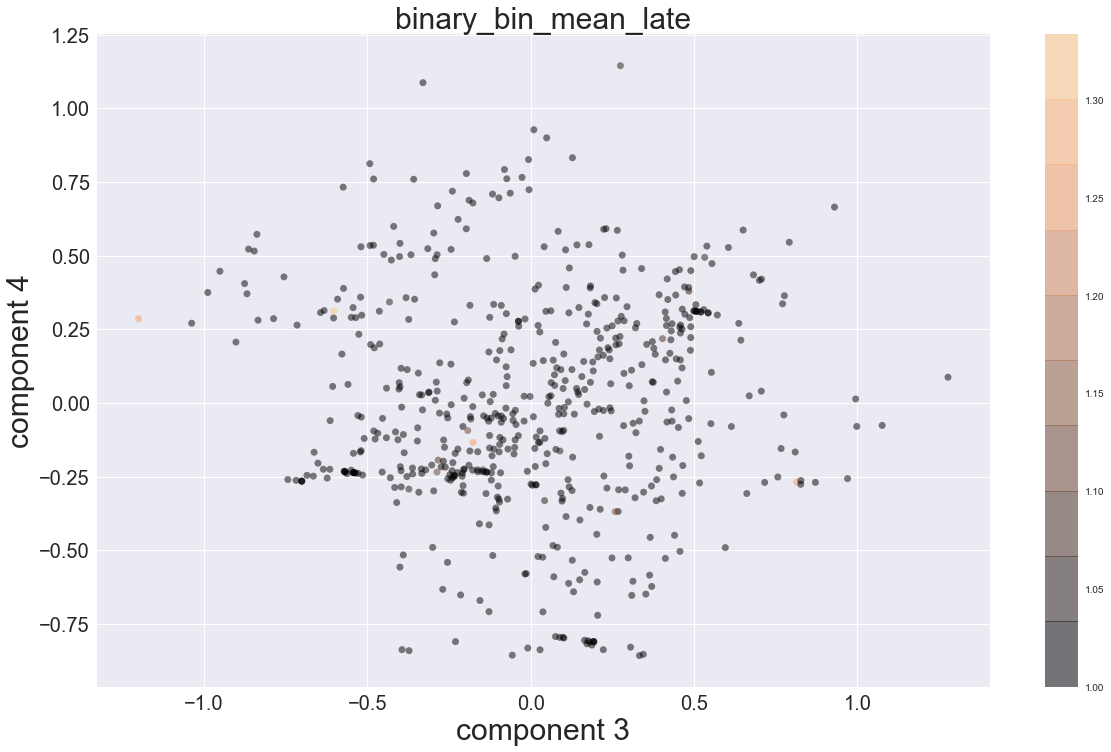

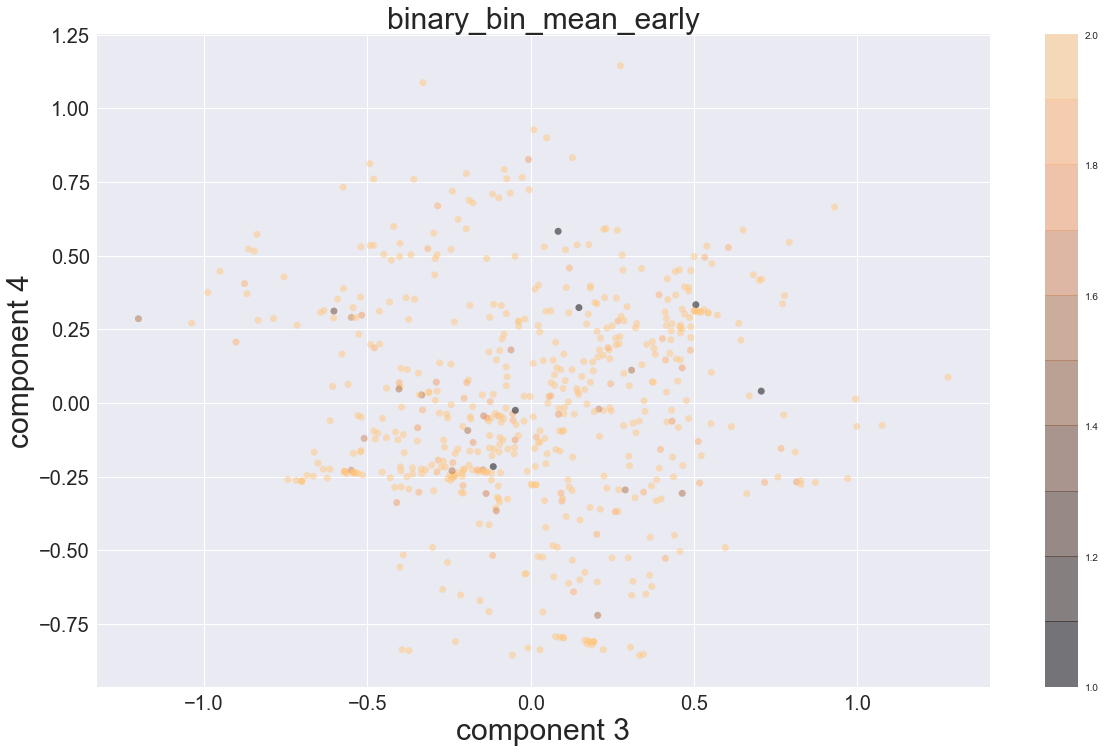

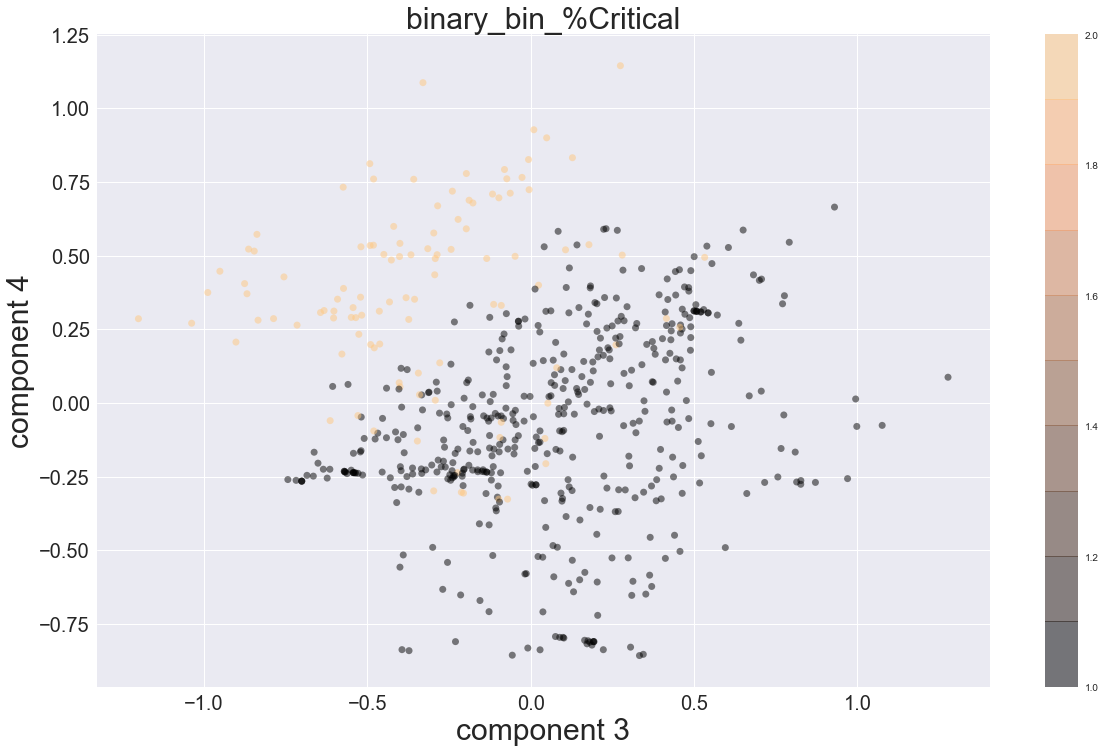

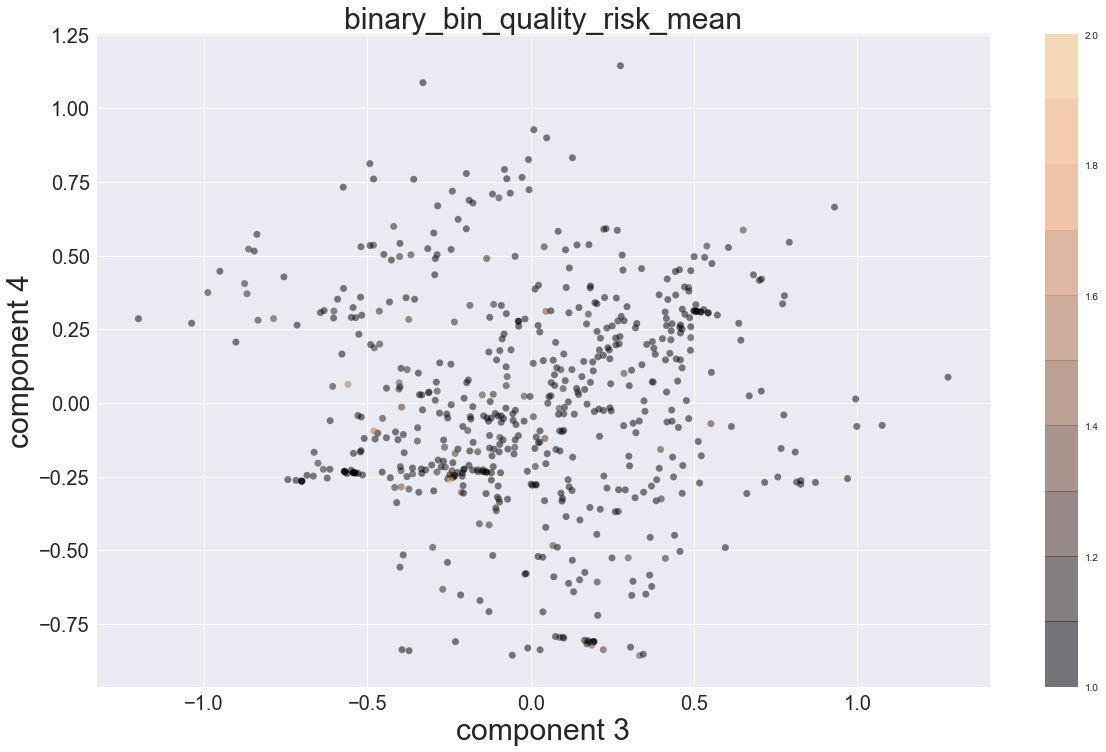

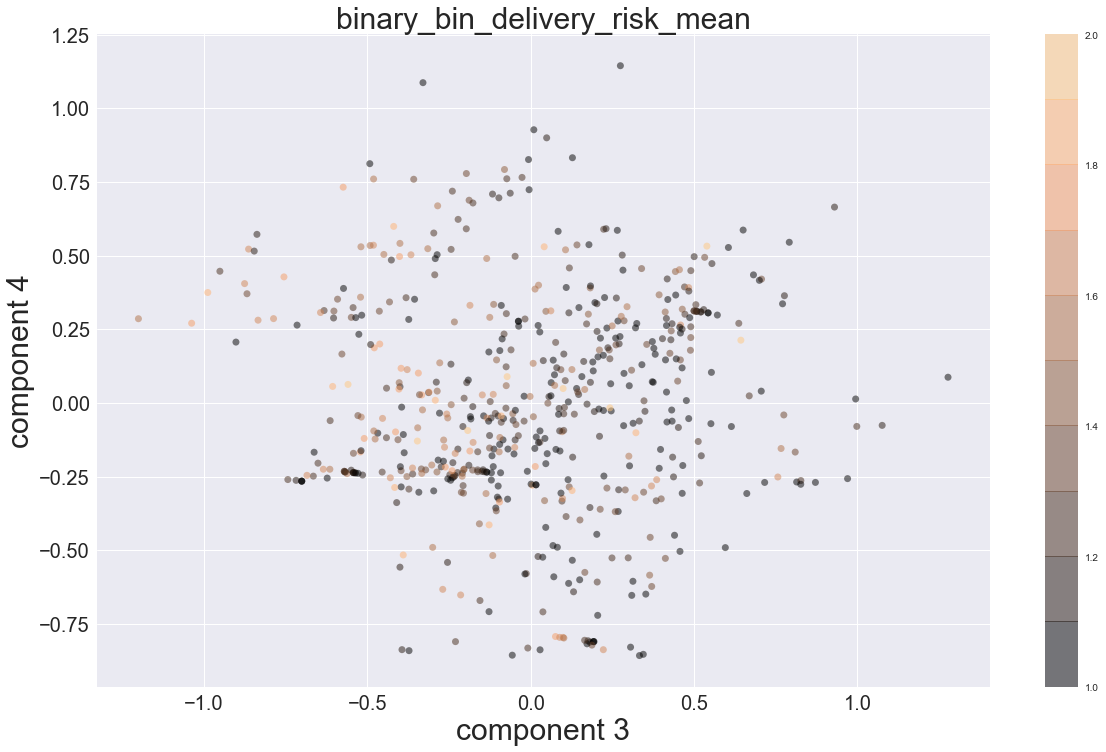

In [14]:
for feat in PCA_feats:
    plt.figure(figsize=(20,12))
    plt.scatter(projected[:, 2], projected[:, 3],
                c=x[feat], edgecolor='none', alpha=0.5,
                cmap=plt.cm.get_cmap('copper', 10))
    plt.xlabel('component 3', fontsize=30)
    plt.ylabel('component 4', fontsize=30)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)
    plt.title(file+"_bin_"+feat, fontsize=30)
    plt.colorbar();
    fname = file+"_PCA_3_4_" + feat
    plt.savefig(fname)
    plt.show()

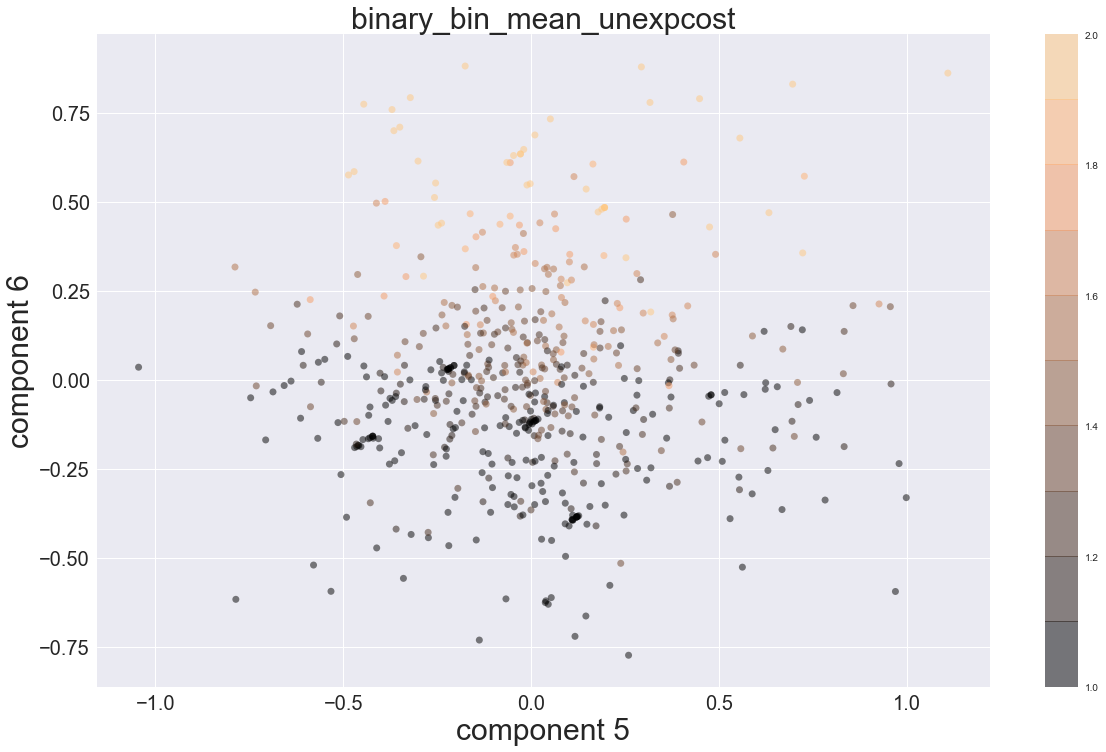

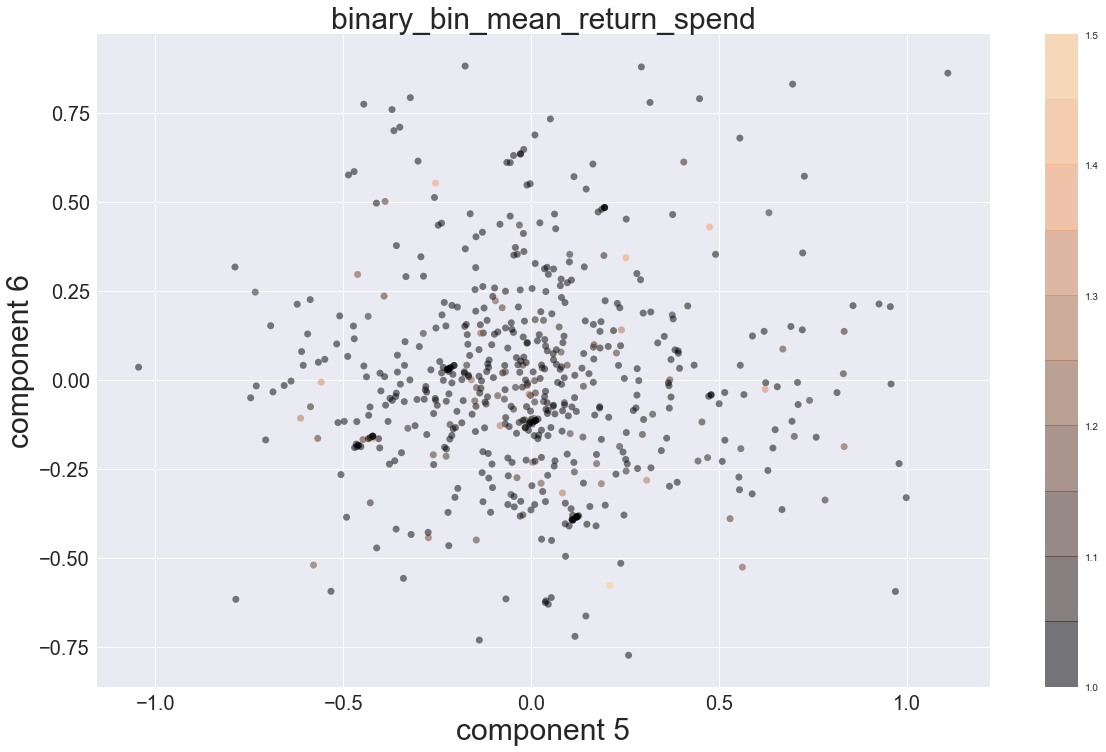

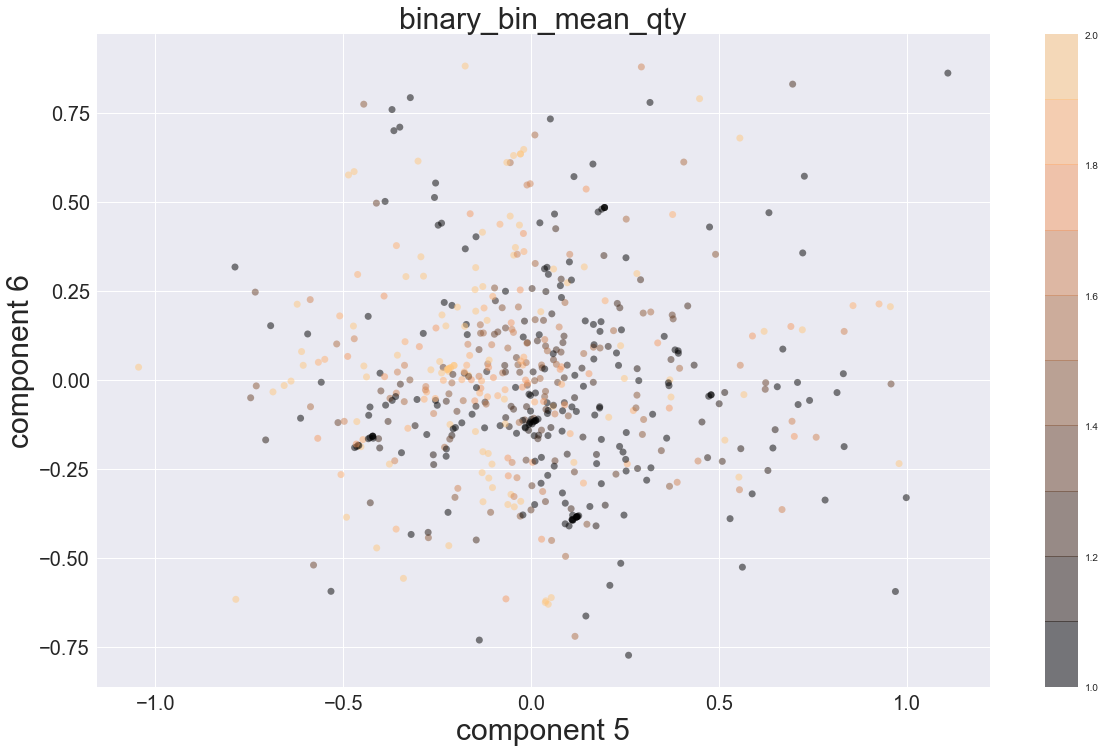

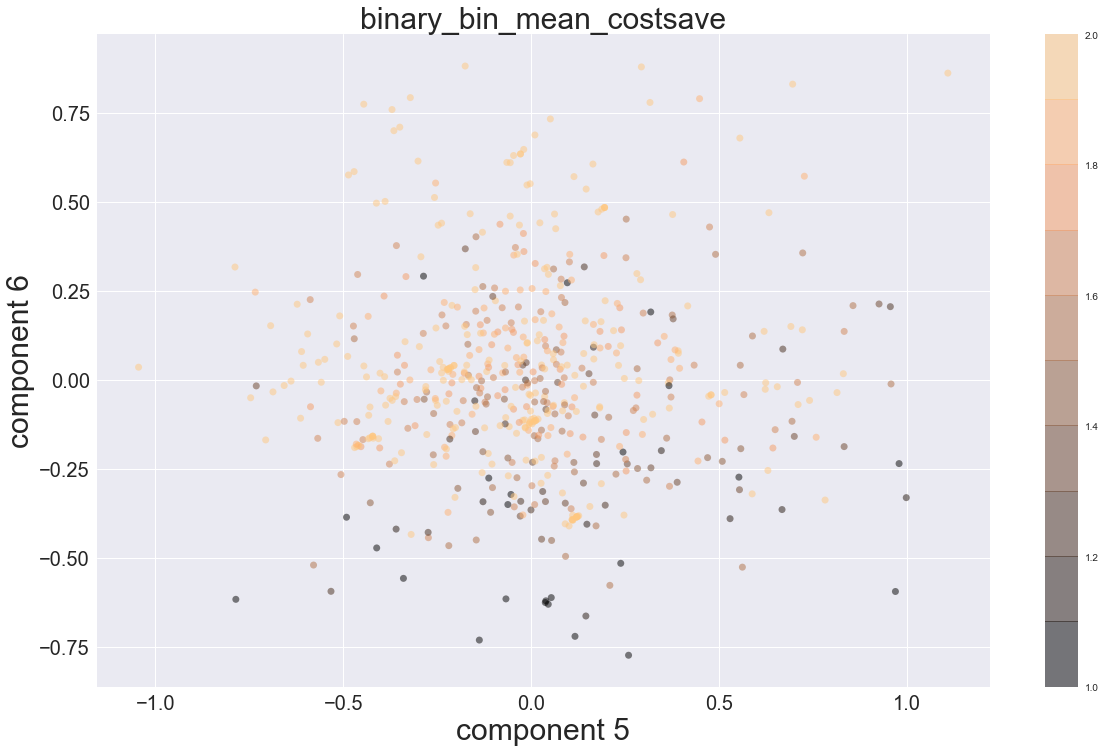

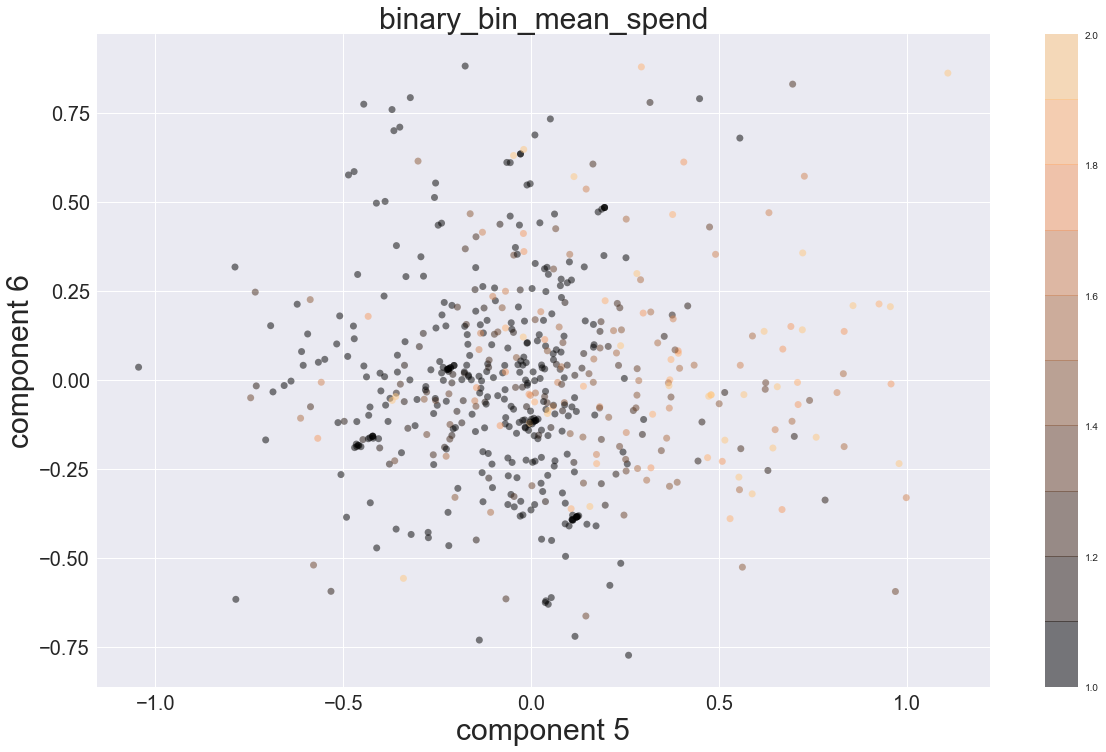

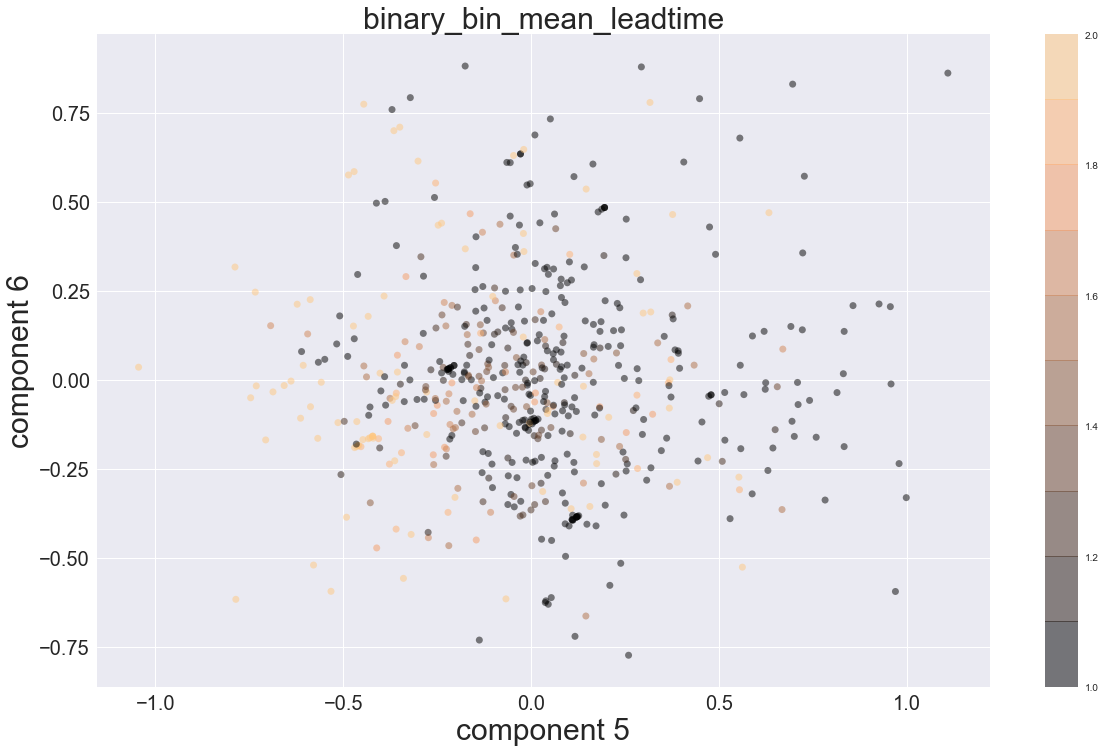

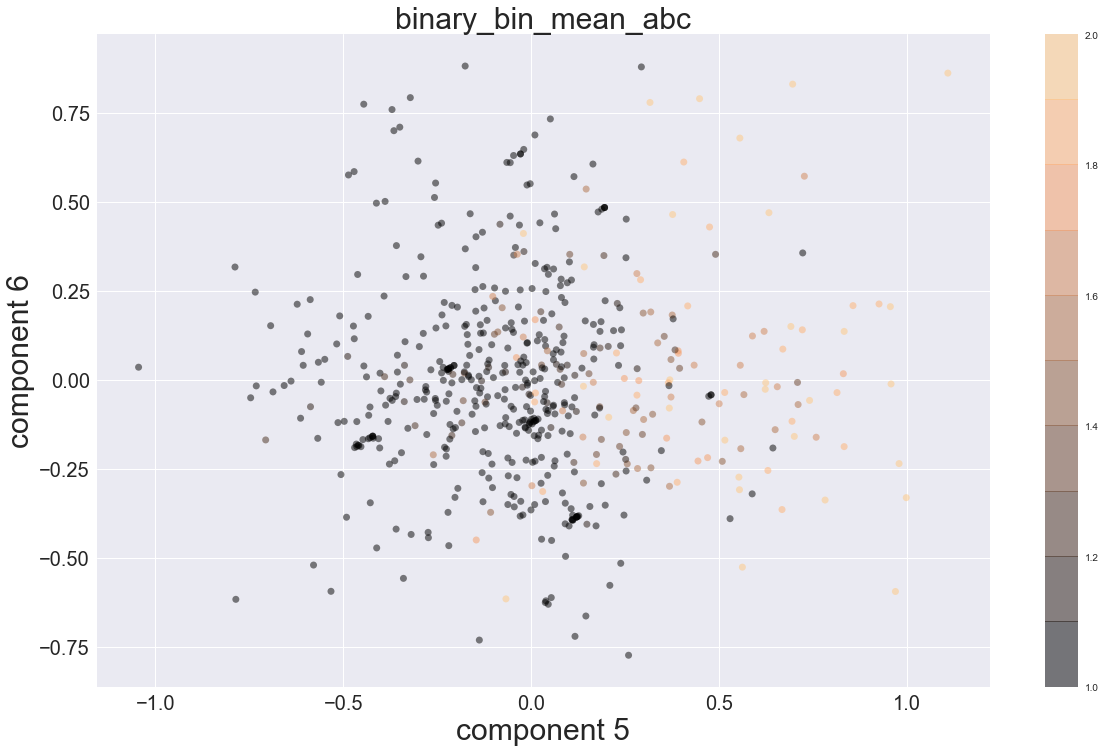

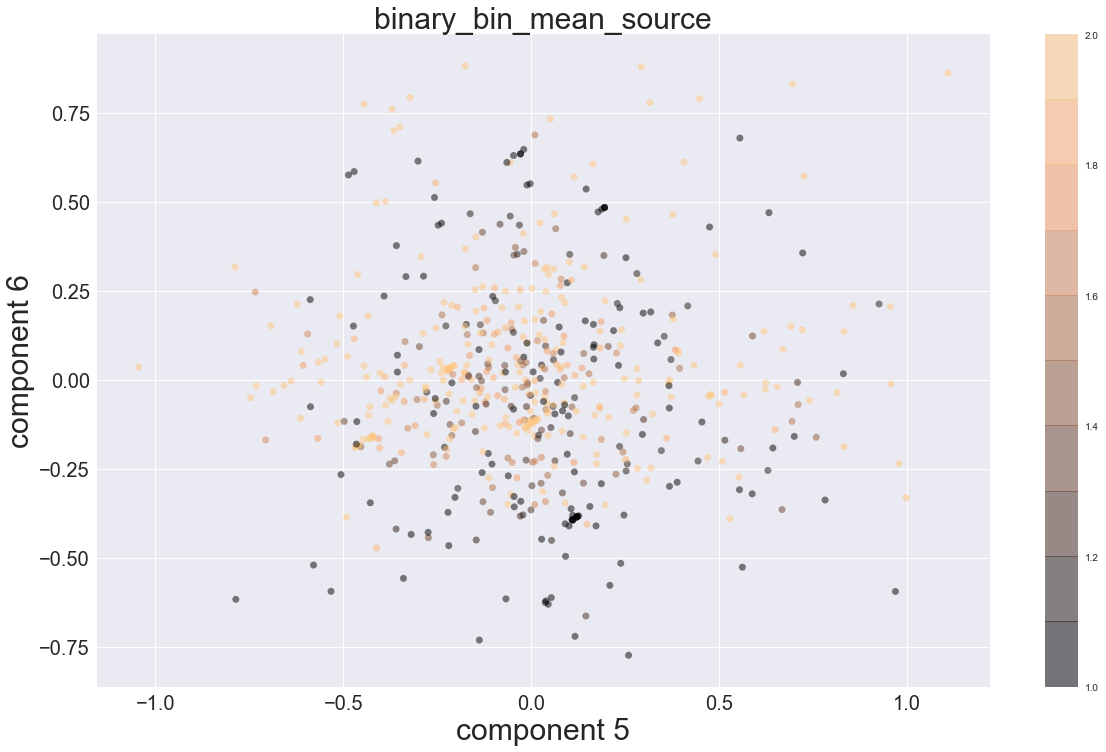

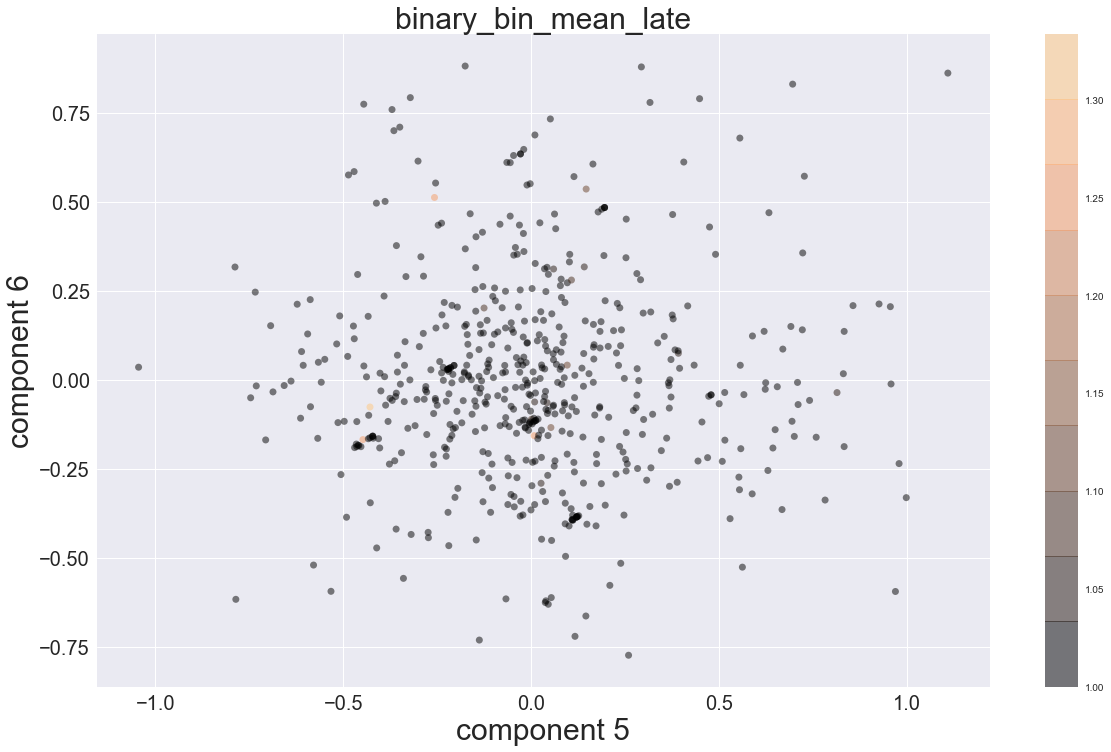

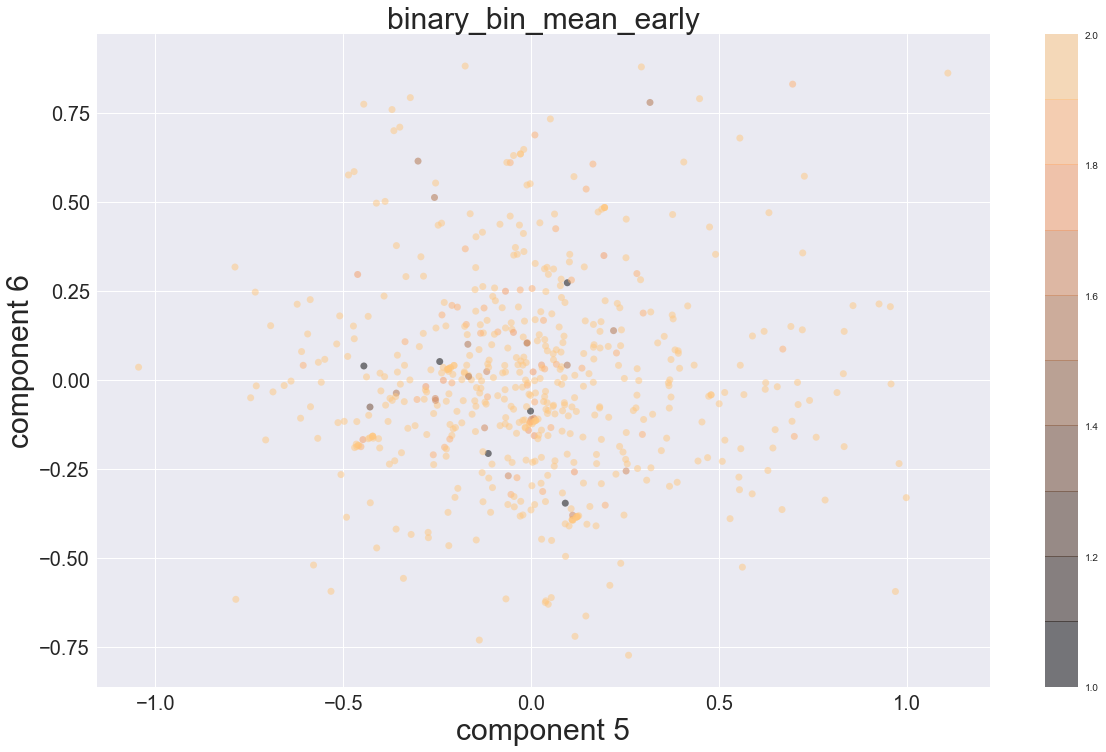

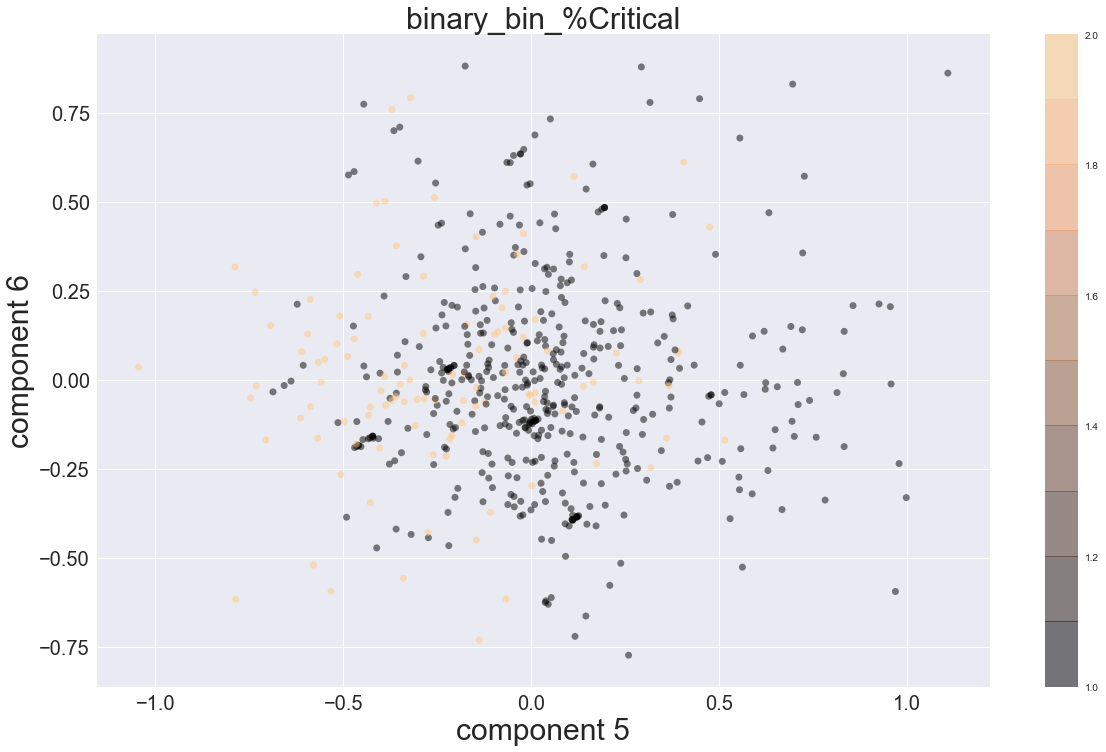

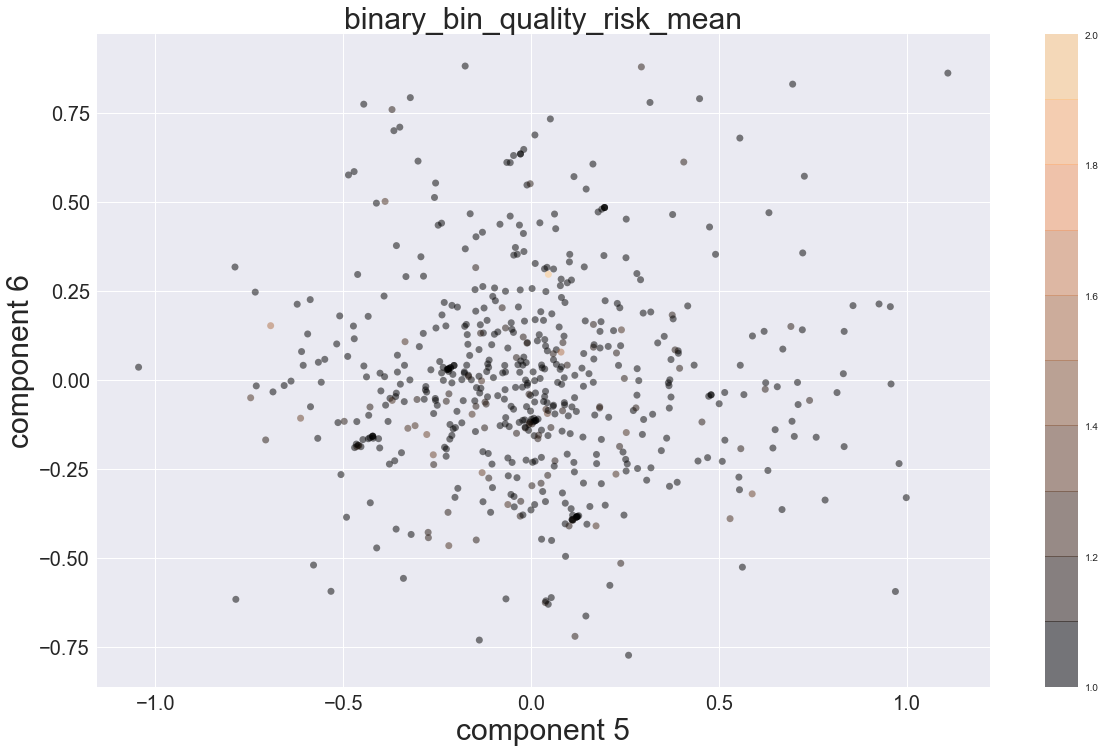

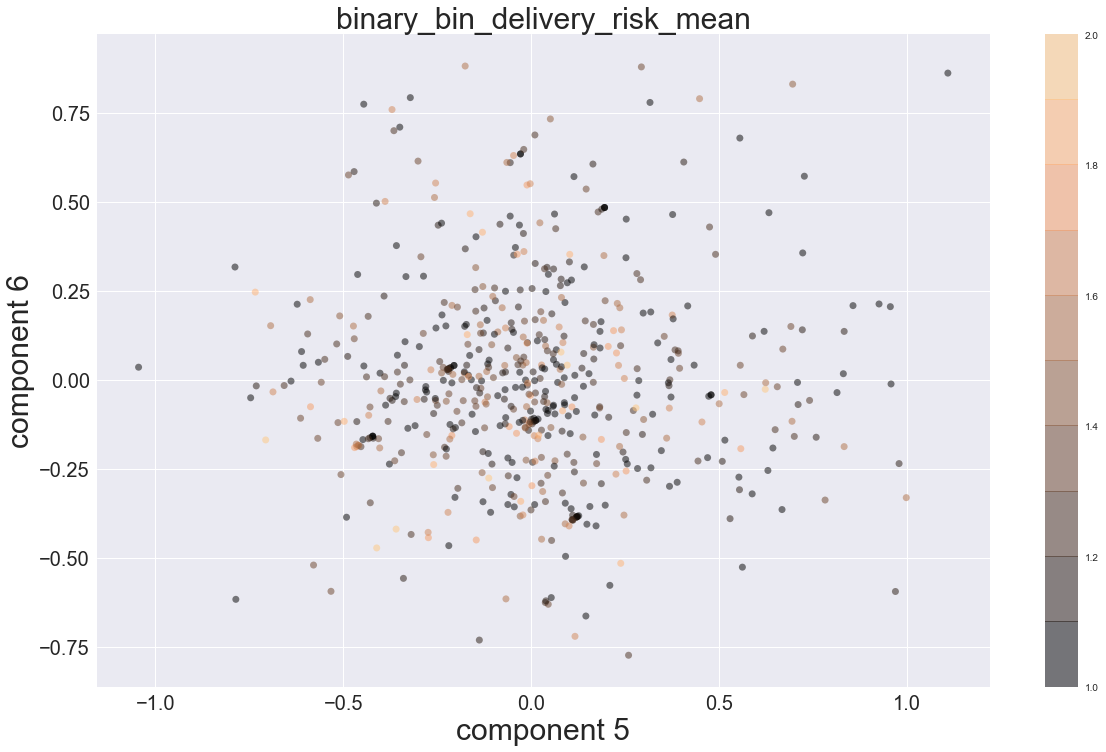

In [15]:
for feat in PCA_feats:
    plt.figure(figsize=(20,12))
    plt.scatter(projected[:, 4], projected[:, 5],
                c=x[feat], edgecolor='none', alpha=0.5,
                cmap=plt.cm.get_cmap('copper', 10))
    plt.xlabel('component 5', fontsize=30)
    plt.ylabel('component 6', fontsize=30)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)
    plt.title(file+"_bin_"+feat, fontsize=30)
    plt.colorbar();
    fname = file+"_PCA_5_6_" + feat
    plt.savefig(fname)
    plt.show()

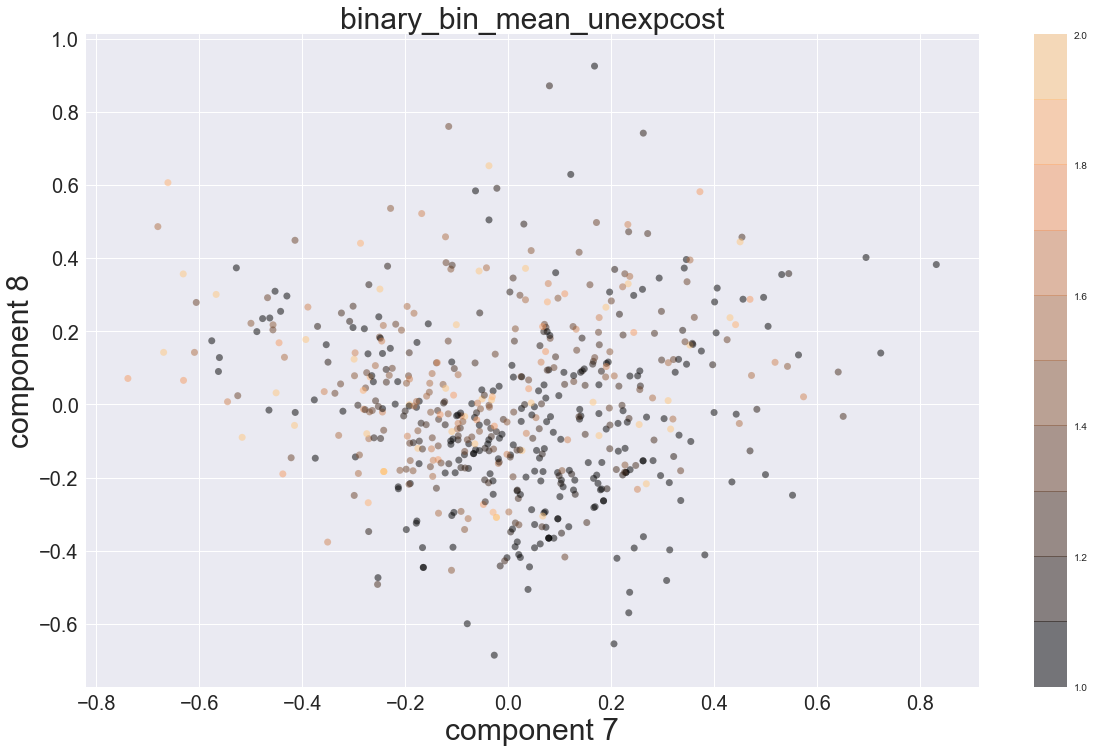

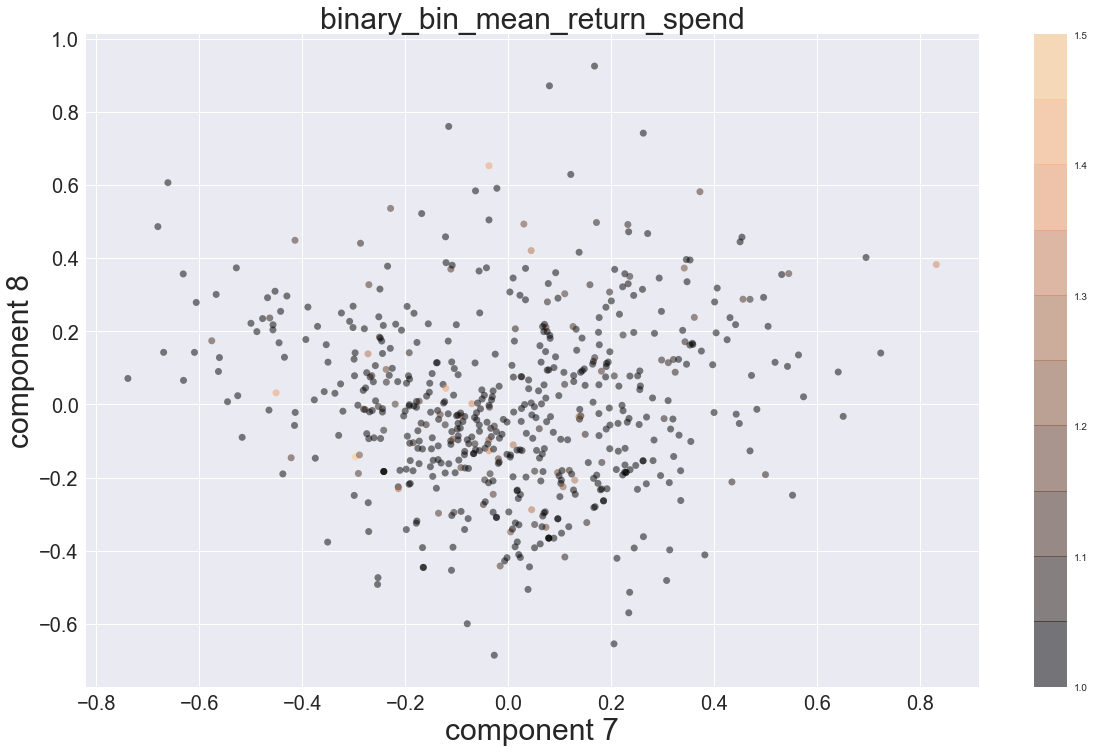

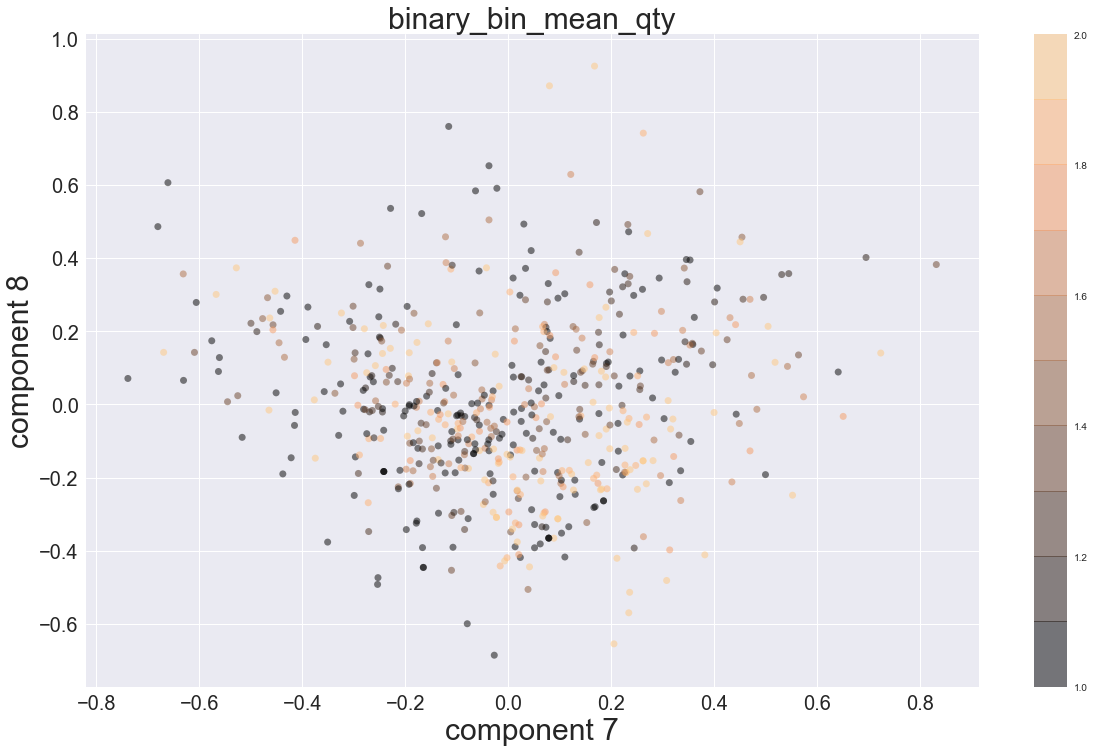

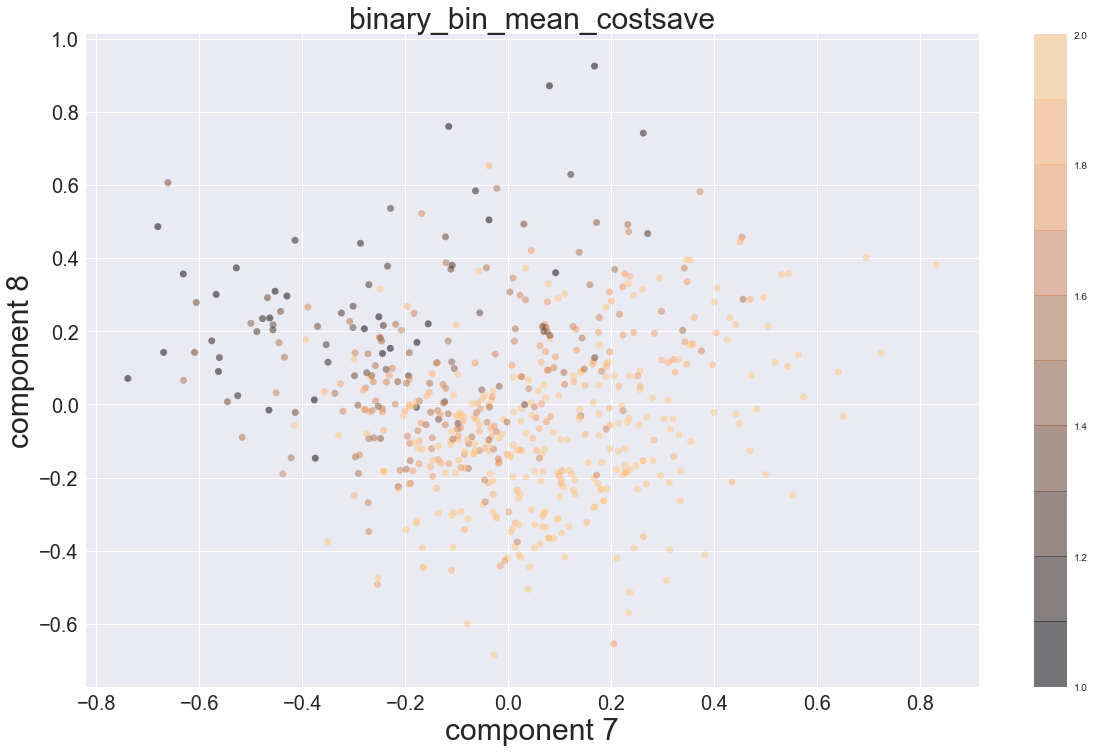

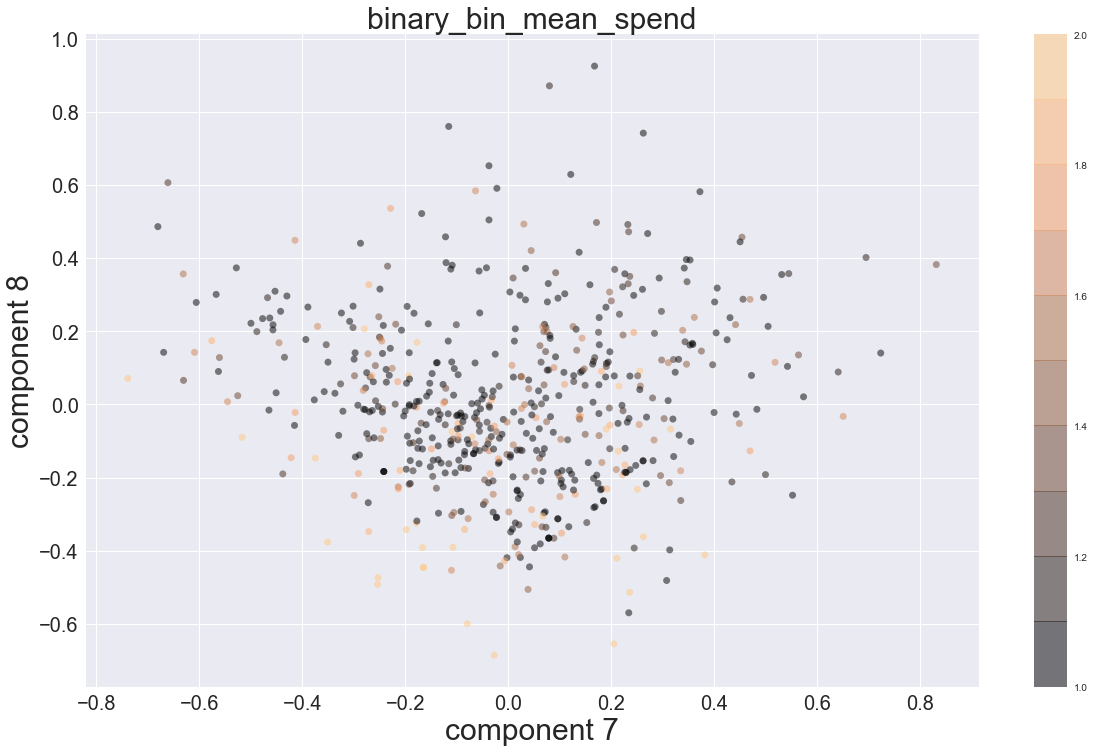

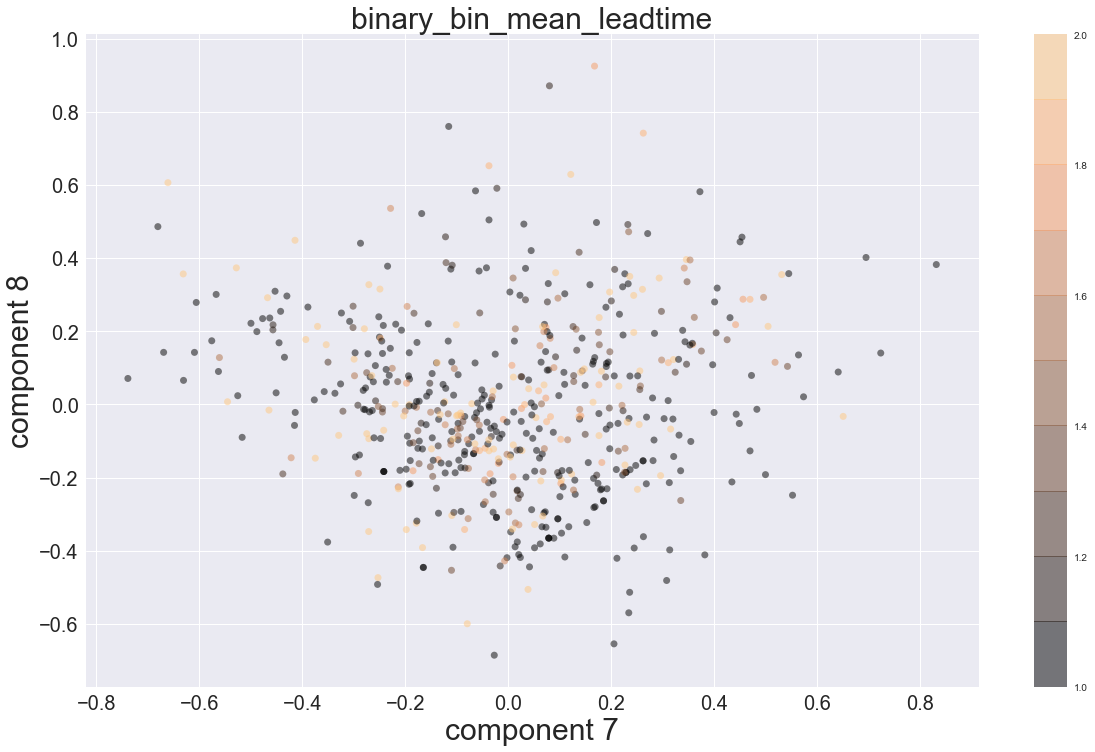

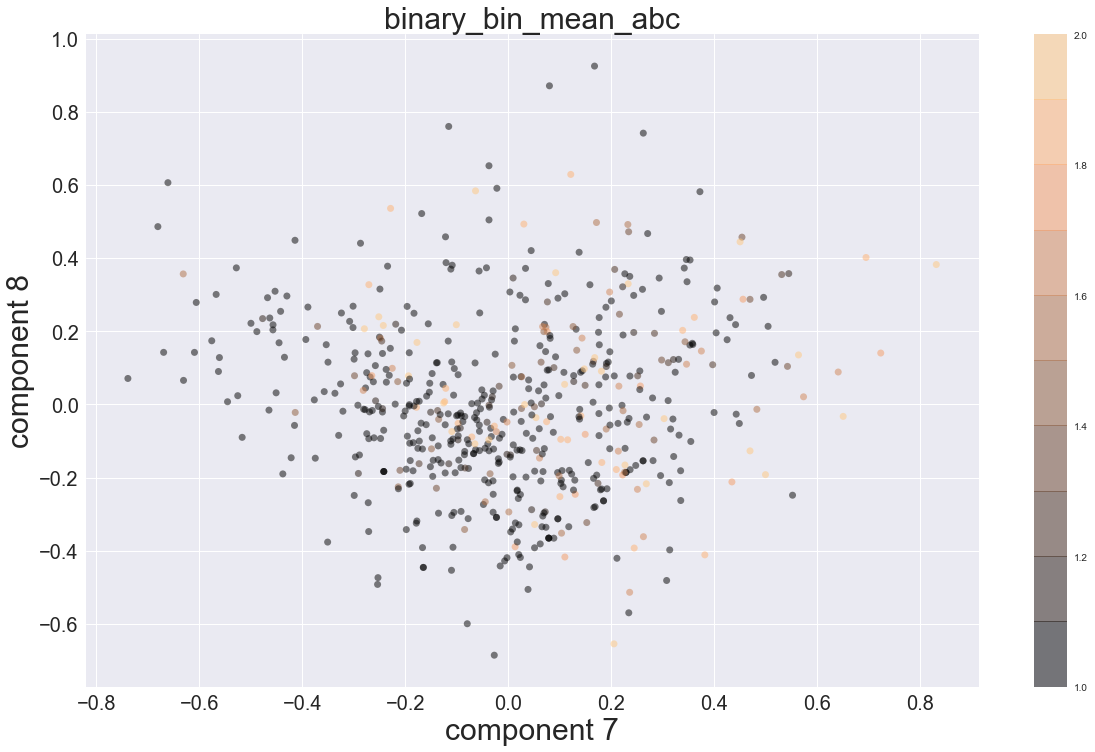

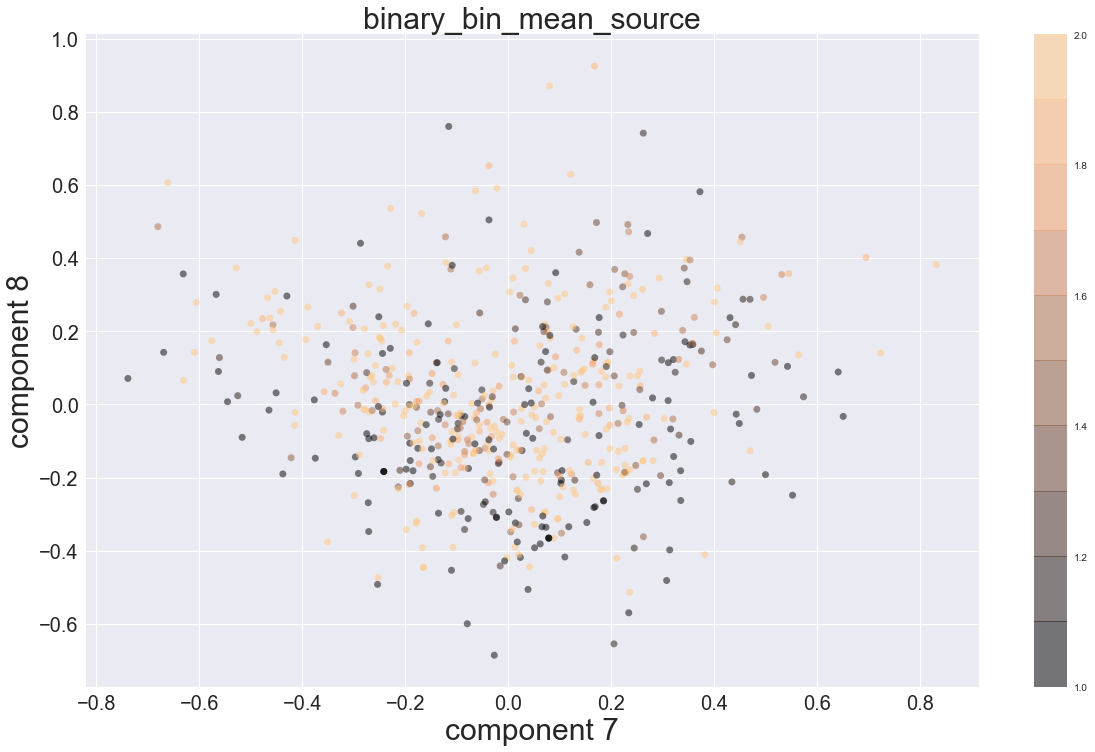

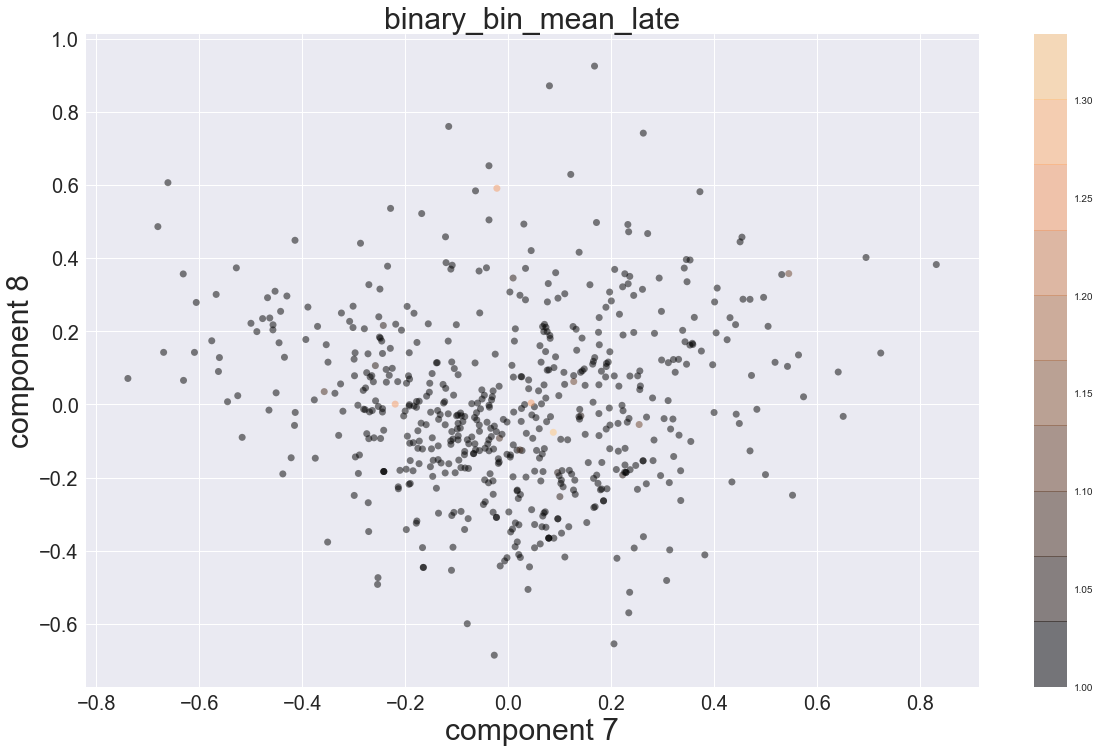

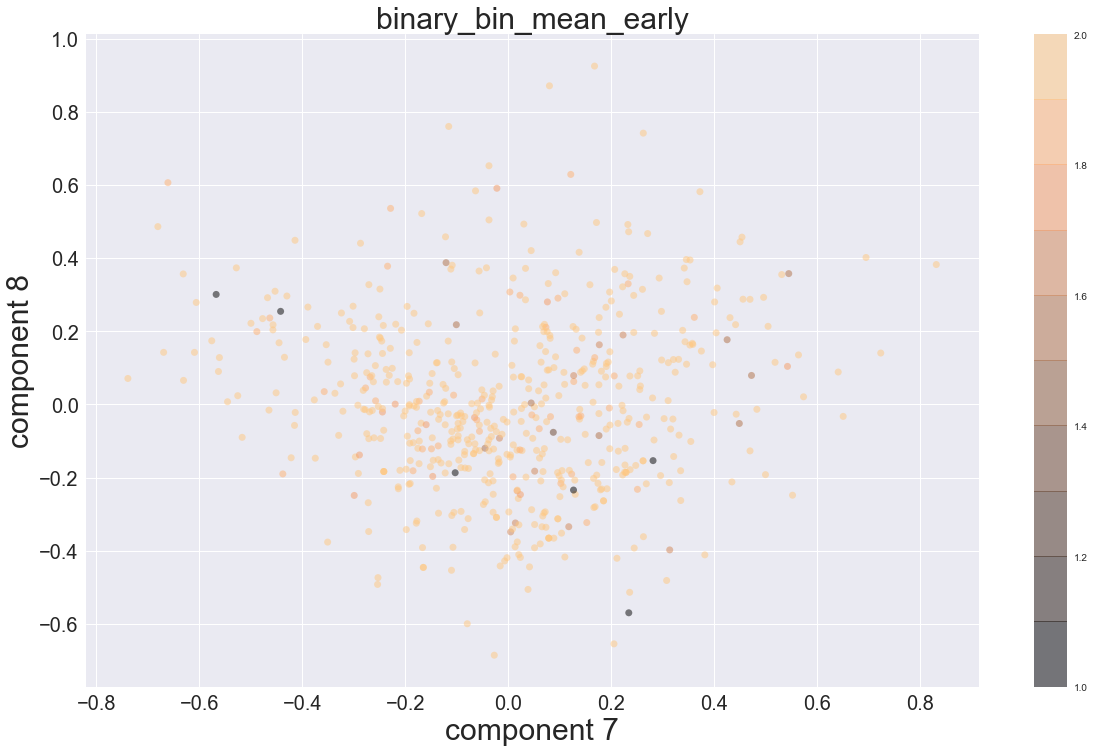

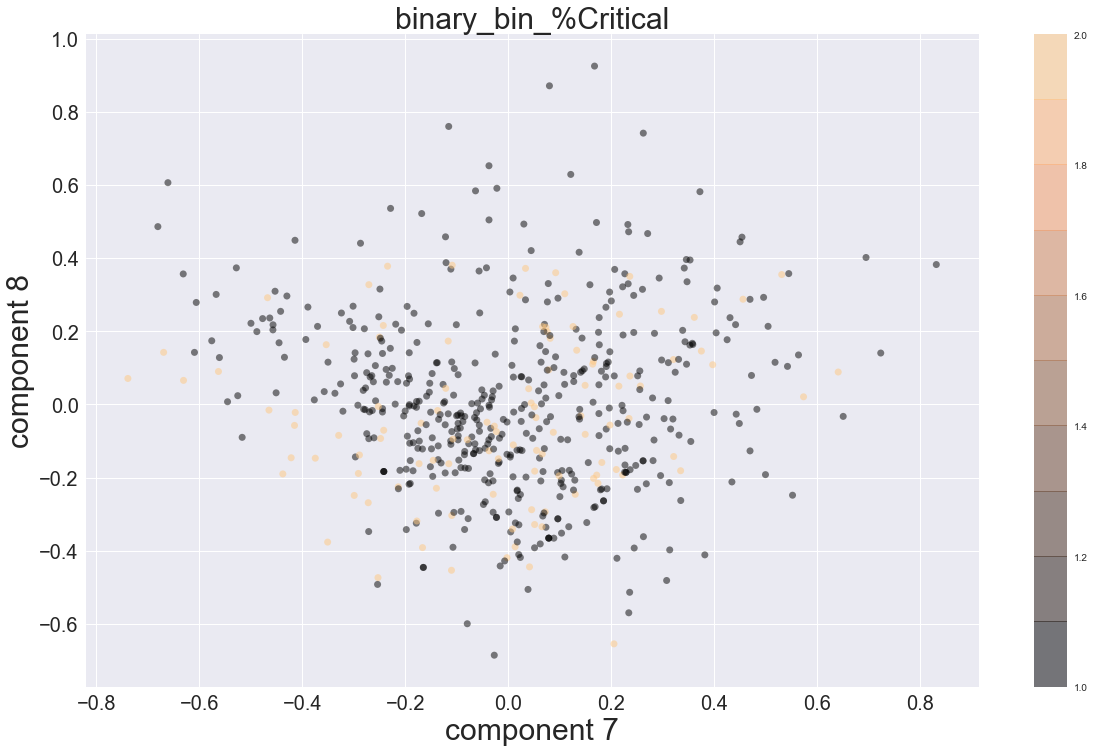

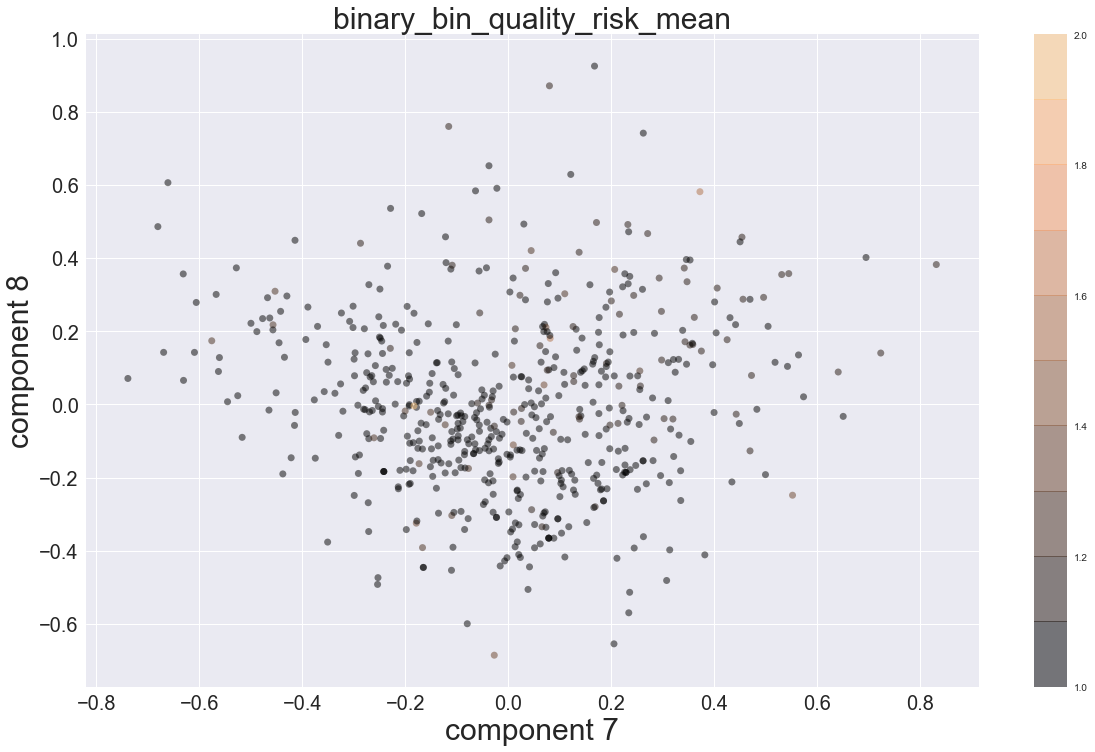

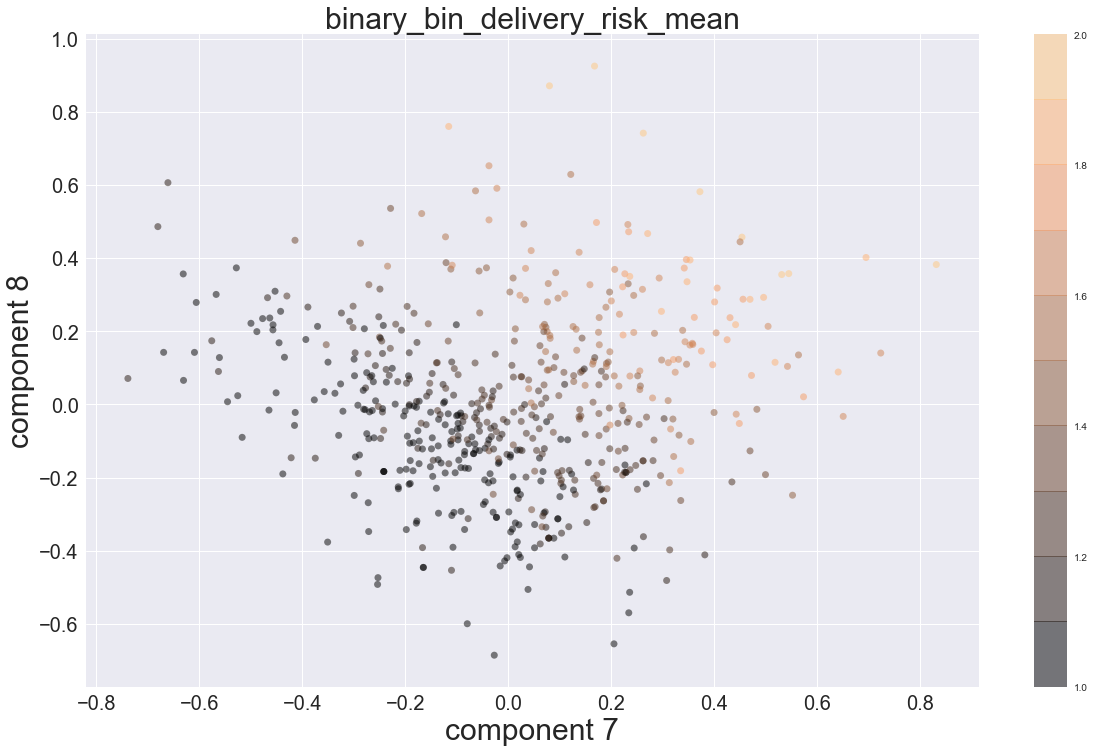

In [16]:
for feat in PCA_feats:
    plt.figure(figsize=(20,12))
    plt.scatter(projected[:, 6], projected[:, 7],
                c=x[feat], edgecolor='none', alpha=0.5,
                cmap=plt.cm.get_cmap('copper', 10))
    plt.xlabel('component 7', fontsize=30)
    plt.ylabel('component 8', fontsize=30)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)
    plt.title(file+"_bin_"+feat, fontsize=30)
    plt.colorbar();
    fname = file+"_PCA_7_8_" + feat
    plt.savefig(fname)
    plt.show()

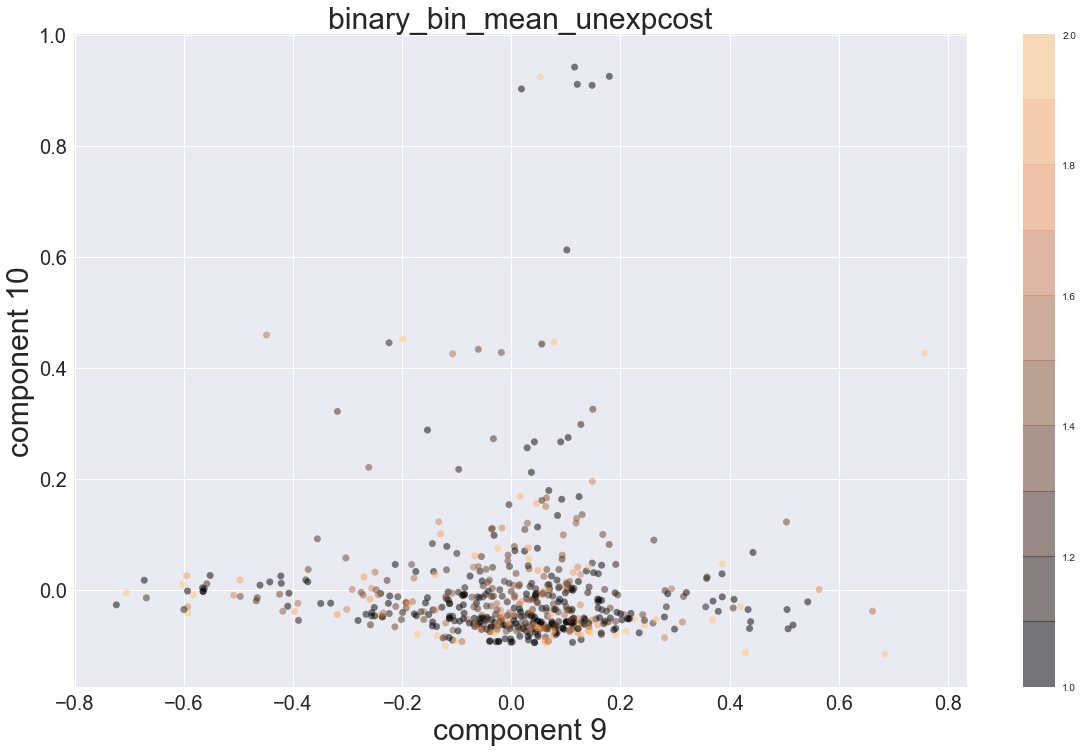

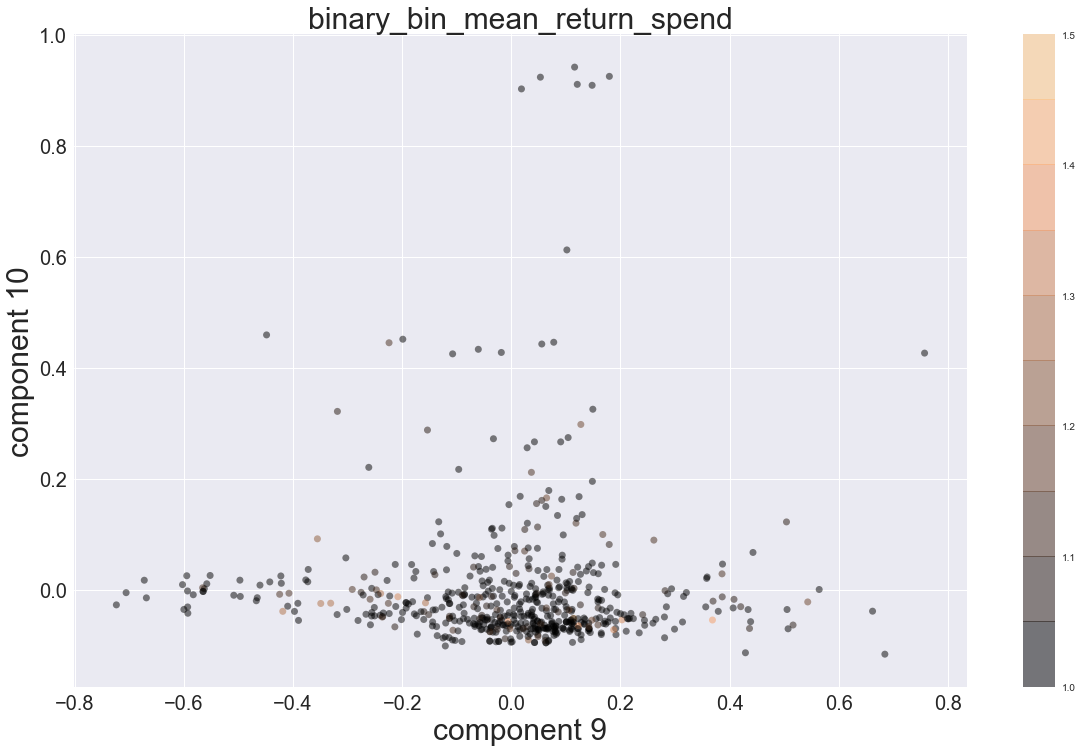

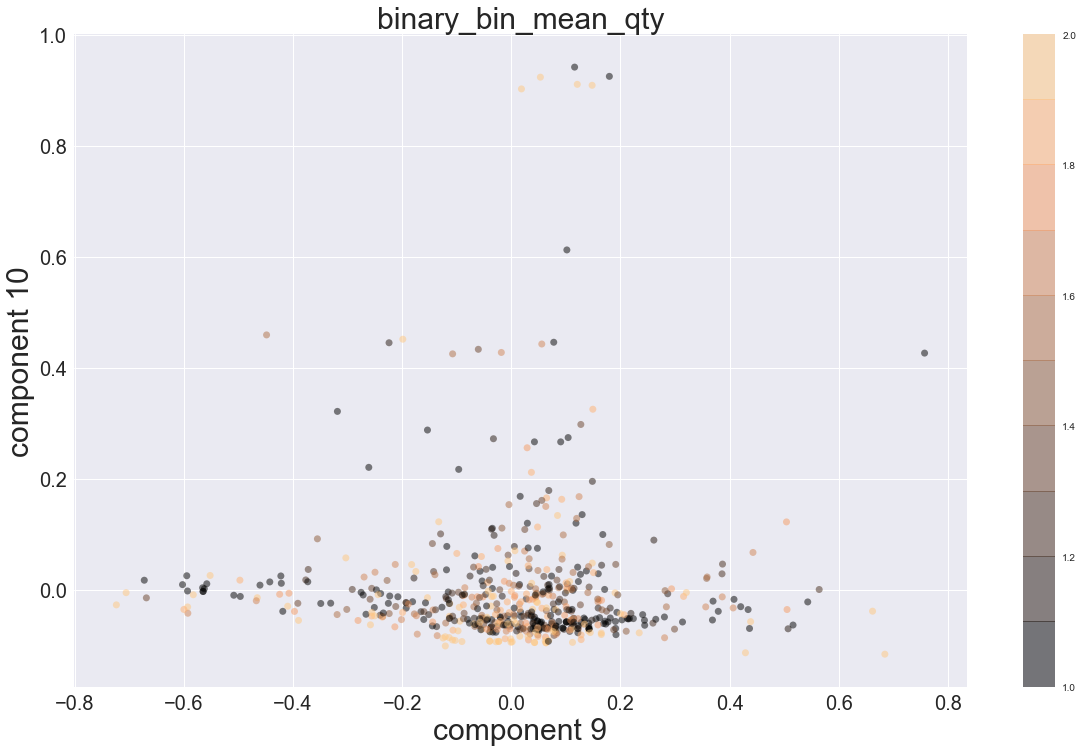

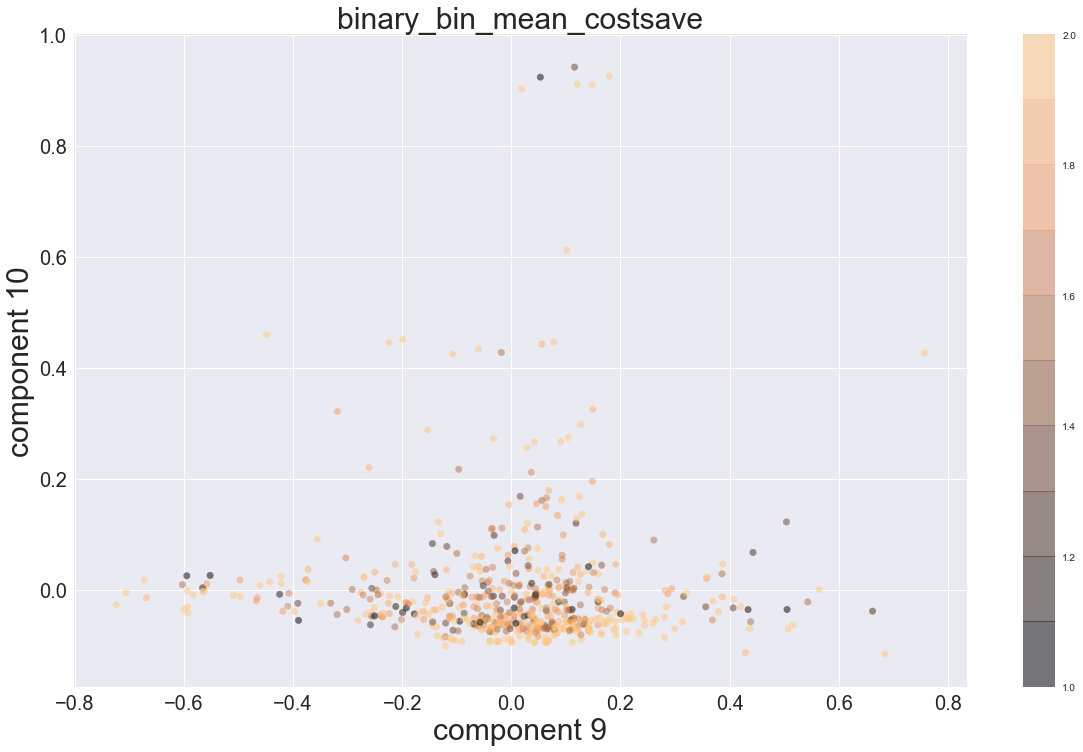

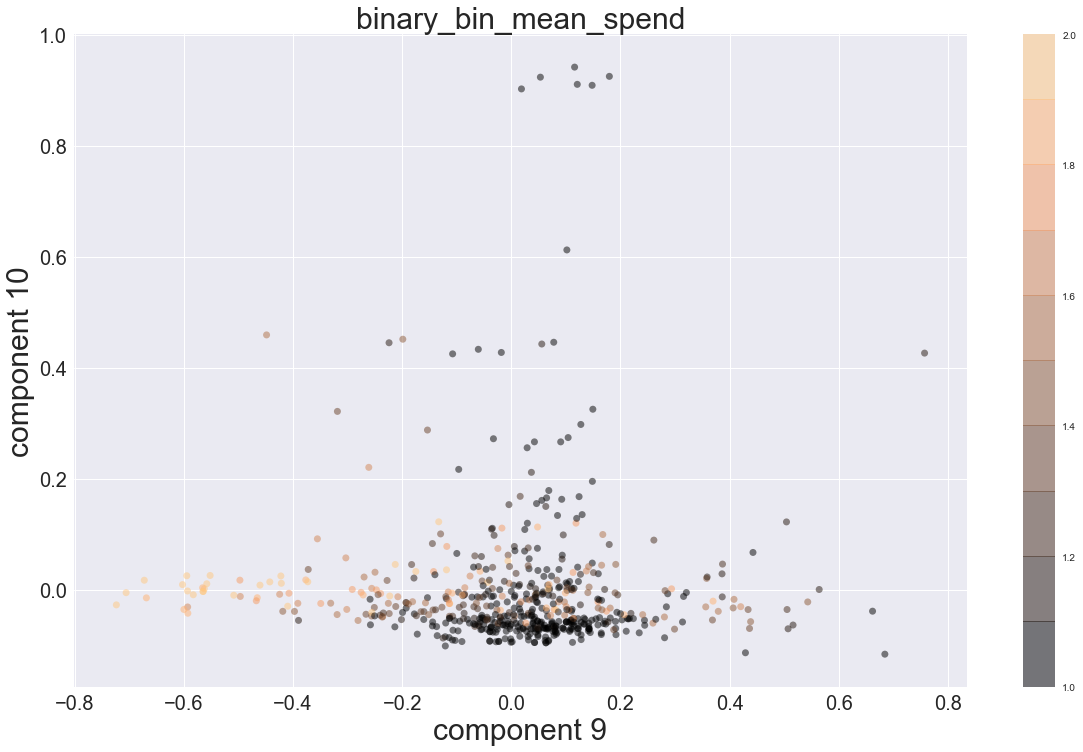

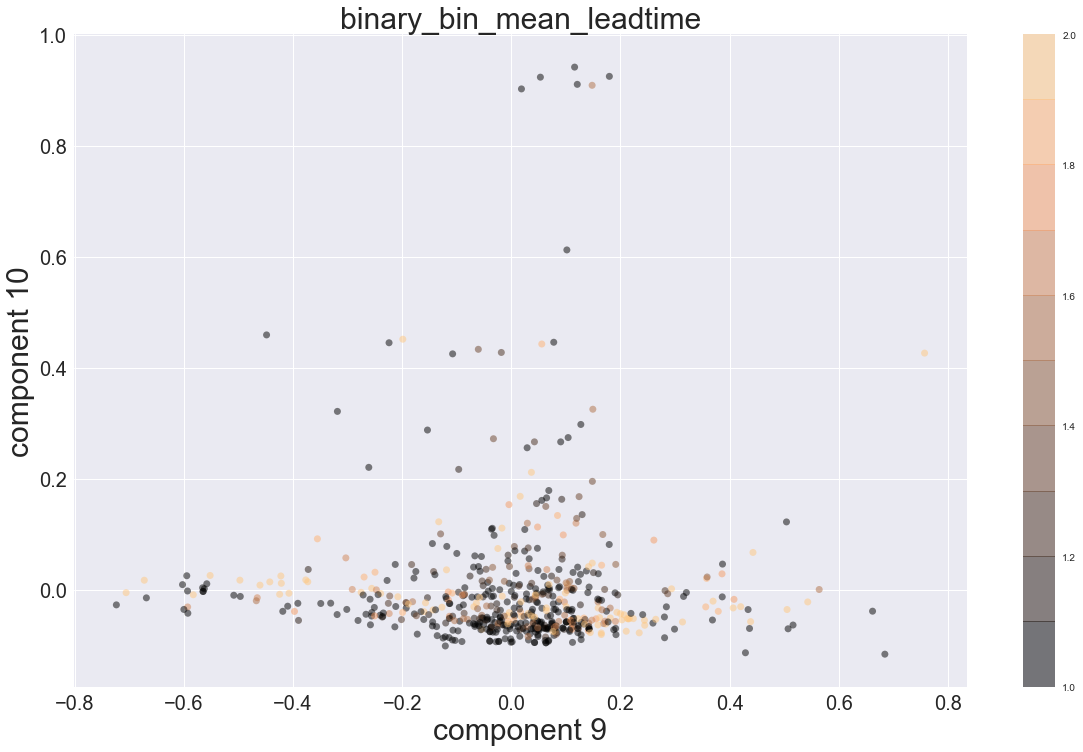

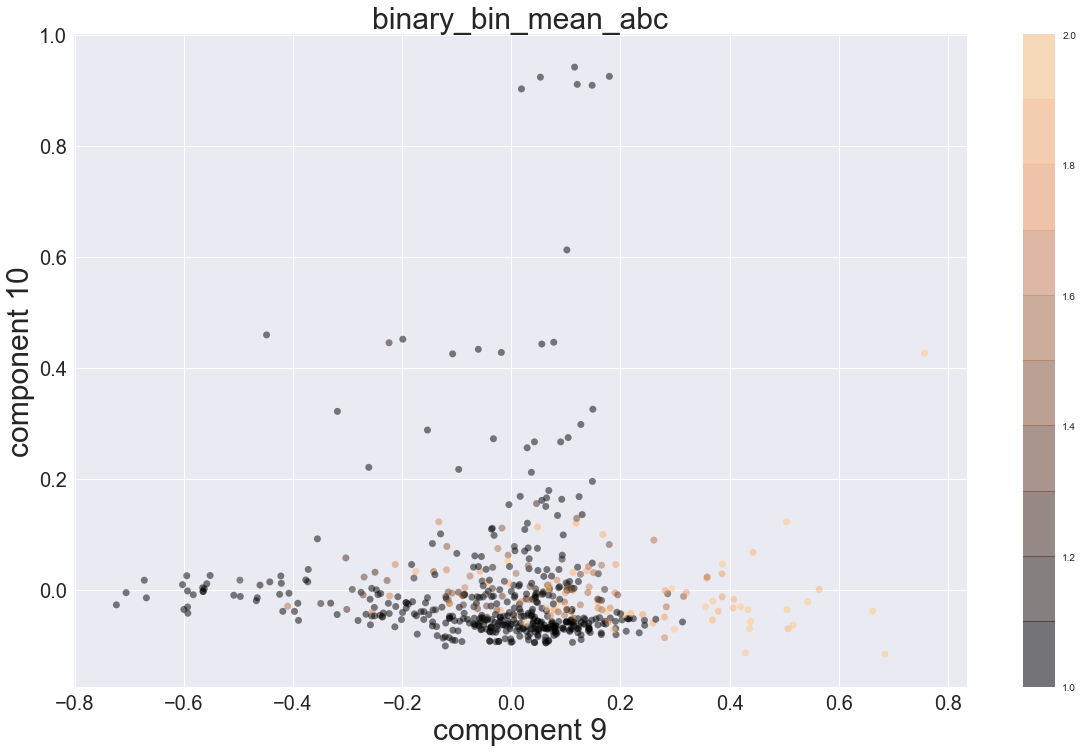

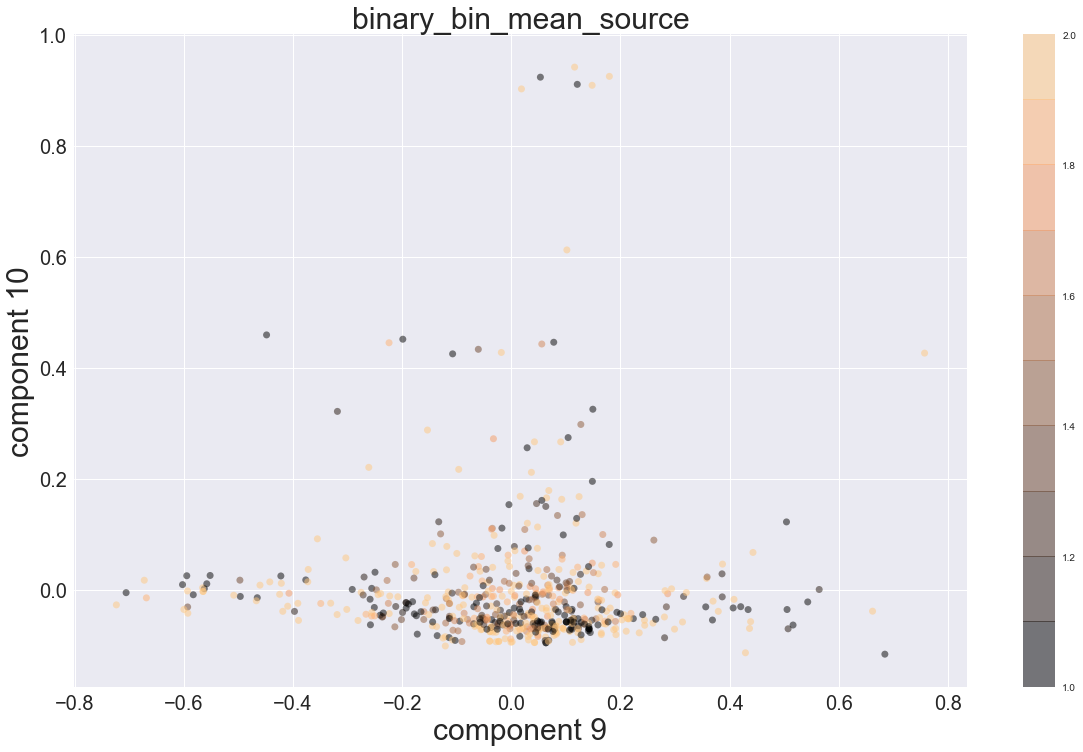

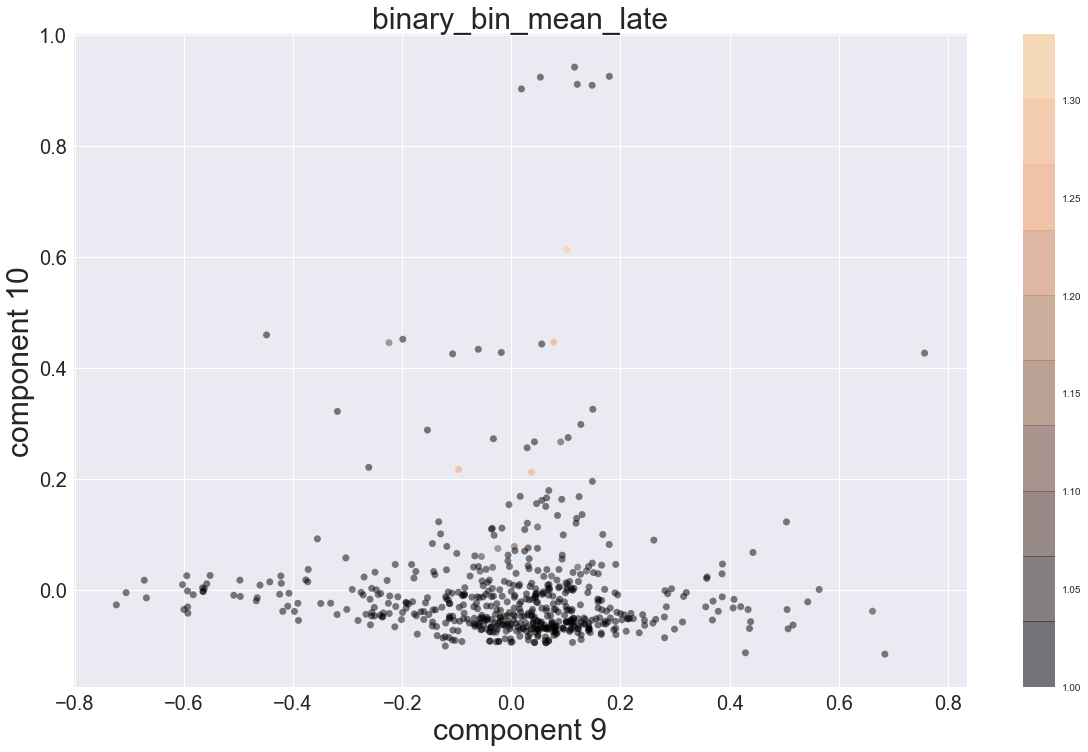

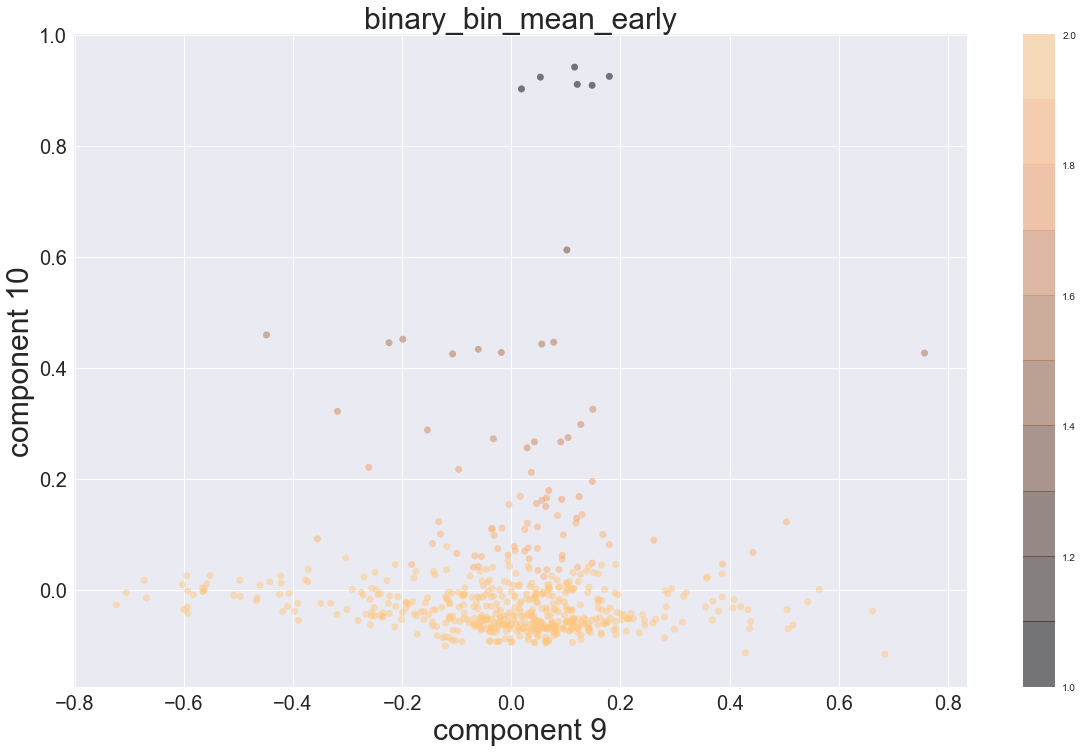

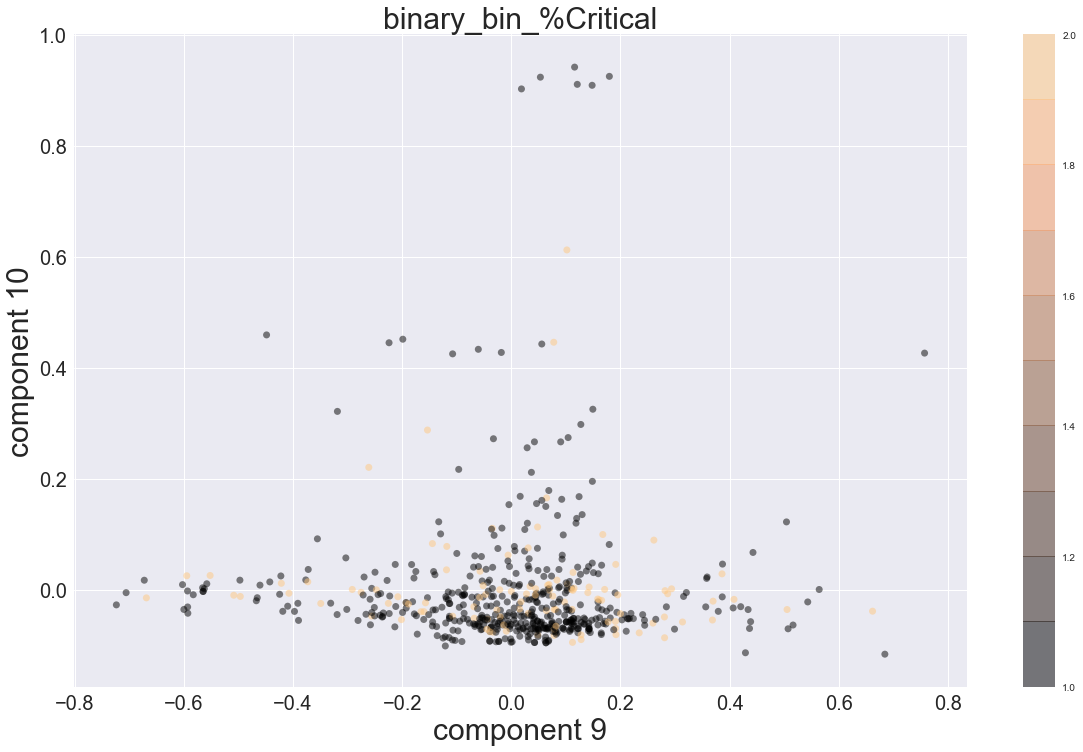

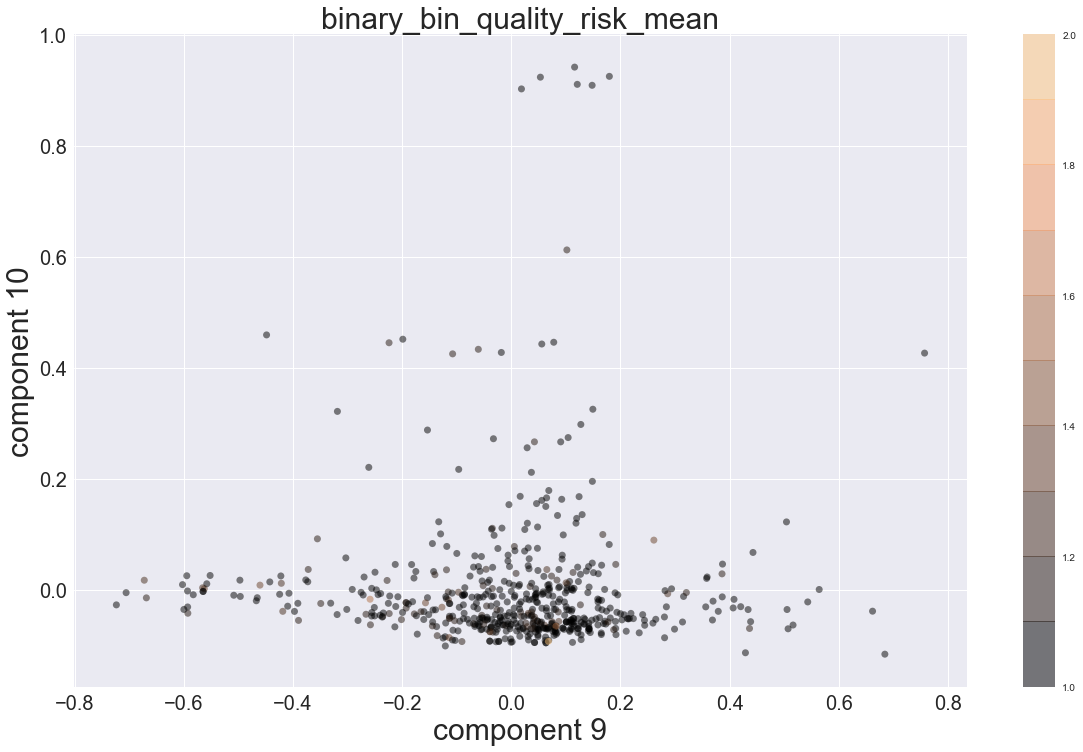

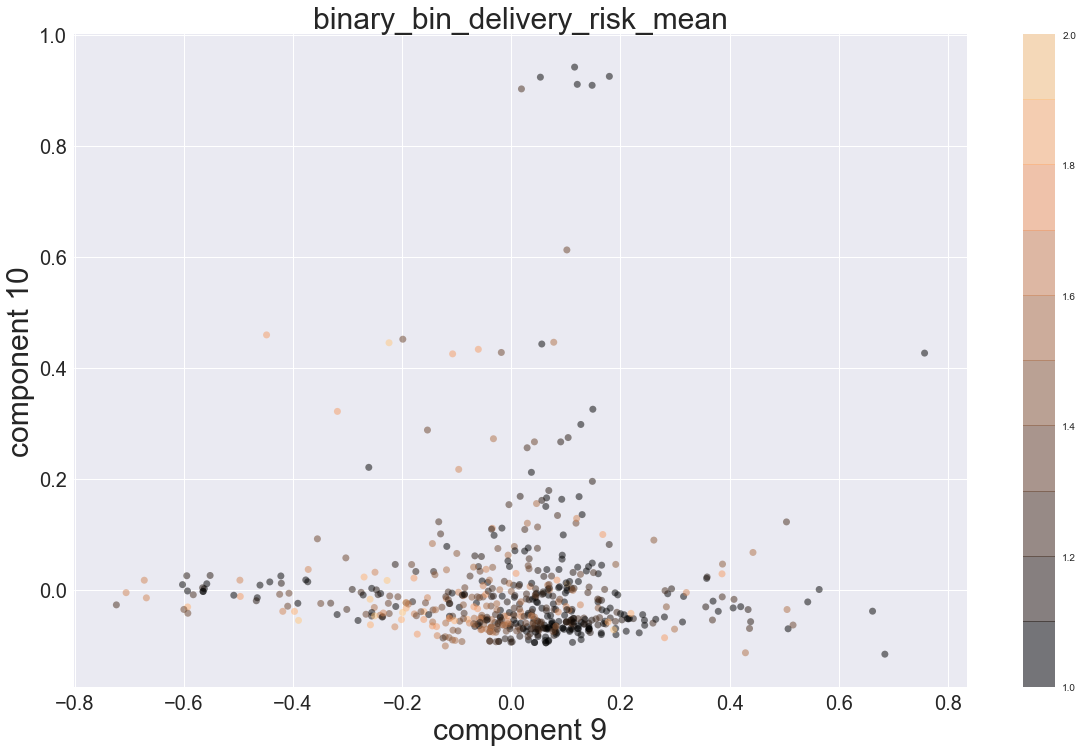

In [17]:
for feat in PCA_feats:
    plt.figure(figsize=(20,12))
    plt.scatter(projected[:, 8], projected[:, 9],
                c=x[feat], edgecolor='none', alpha=0.5,
                cmap=plt.cm.get_cmap('copper', 10))
    plt.xlabel('component 9', fontsize=30)
    plt.ylabel('component 10', fontsize=30)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)
    plt.title(file+"_bin_"+feat, fontsize=30)
    plt.colorbar();
    fname = file+"_PCA_9_10_" + feat
    plt.savefig(fname)
    plt.show()